In [10]:
# List of libraries to check and install if missing
libraries = [
    "numpy", "pandas", "time", "folium", "folium.plugins", "sklearn", "seaborn", "matplotlib", "plotly",
    "user_agents", "ip2geotools", "geopy", "category_encoders", "imblearn", "joblib", "xgboost"
]

for library in libraries:
    try:
        # Try importing the library
        exec(f"import {library}")
    except ImportError:
        print(f"Library {library} not found. Installing...")
        !pip install {library}


Library user_agents not found. Installing...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.1/86.1 kB 2.0 MB/s eta 0:00:00ta 0:00:01
Library ip2geotools not found. Installing...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.5/47.5 kB 722.3 kB/s eta 0:00:00 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.4/275.4 kB 6.9 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 951.6 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.2/94.2 kB 2.2 MB/s eta 0:00:000:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.0/88.0 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.6/522.6 kB 13.7 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.4/587.4 kB 15.2 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 

In [11]:
# Manipulate
import numpy as np
import pandas as pd
import time
import folium
import folium.plugins as plugins
from sklearn.preprocessing import FunctionTransformer
import warnings
warnings.filterwarnings('ignore')

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Feature Extraction
import user_agents  # Get info from user_agent (browser_info)
from ip2geotools.databases.noncommercial import DbIpCity as ip2geo  # Get location from ip
from geopy.distance import great_circle, geodesic
from geopy.geocoders import Nominatim  # Geocode("place") / reverse("lat,long")
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer  # Text feature

# Pre-Processing
from sklearn.model_selection import train_test_split  # Train-test-split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer  # Detect & handle NaNs
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, OneHotEncoder  # Ordinal Encoding, Nominal Encoding
import category_encoders
from imblearn.under_sampling import RandomUnderSampler  # Undersampling
from imblearn.over_sampling import RandomOverSampler, SMOTE  # Oversampling
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler  # Scaling

# Modeling
# 1) Pipeline
from sklearn.pipeline import Pipeline, make_pipeline  # To make pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer, make_column_selector  # Apply pipeline to each column

# 2) Regression Models
from sklearn.linear_model import LinearRegression  # If data is small and small_no_features
from sklearn.linear_model import SGDRegressor  # If data is large: (can have penalty=constraints)
from sklearn.preprocessing import PolynomialFeatures  # For polynomial regression (then apply scaling after it)
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV  # Regularization

# 2') Classification Models
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB, BernoulliNB, CategoricalNB, MultinomialNB
from sklearn.svm import LinearSVC, SVC, LinearSVR, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import VotingClassifier, VotingRegressor  # Ensemble (Voting)
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, RandomForestClassifier, RandomForestRegressor, ExtraTreesClassifier, ExtraTreesRegressor  # Bagging & Pasting
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor, GradientBoostingClassifier, GradientBoostingRegressor, HistGradientBoostingClassifier, HistGradientBoostingRegressor  # Boosting
from sklearn.ensemble import StackingClassifier, StackingRegressor  # Stacking

# 3) Model Selection (Underfitting vs Overfitting) [Bias-variance tradeoff => perfect model complexity]
from sklearn.model_selection import cross_val_score, cross_val_predict, StratifiedKFold, GridSearchCV, RandomizedSearchCV  # (Train - Valid - Test) + hyperparameters tuning
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV, HalvingRandomSearchCV  # If data / features are large
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error  # Evaluate Model: r2=> accuracy, L2-norm: if no outliers, L1-norm: if outliers
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, precision_recall_curve, roc_curve, roc_auc_score
from scipy import stats  # Confidence Interval of Accuracy / Loss / Utility
import joblib  # Save model

# 4) Dimensionality Reduction
from sklearn.decomposition import PCA, IncrementalPCA  # Till 20K features
from sklearn.random_projection import GaussianRandomProjection, SparseRandomProjection  # >20K features
from sklearn.manifold import LocallyLinearEmbedding, MDS, Isomap, TSNE  # Manifold could be better than Projection
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis  # For classification problems (large distance between different classes)

from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error


### 1) Understanding Data

* a) Understand Columns
* b) check dtype -> df[col].astype()
* c) Describe Numerical Cols
* d) Describe Categorical Cols

In [12]:
df = pd.read_csv("/kaggle/input/us-airbnb-open-data/AB_US_2023.csv", encoding='utf-8')
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,city
0,958,"Bright, Modern Garden Unit - 1BR/1BTH",1169,Holly,NaN,Western Addition,37.770280,-122.433170,Entire home/apt,202,2,383,2023-02-19,2.31,1,128,59,San Francisco
1,5858,Creative Sanctuary,8904,Philip And Tania,NaN,Bernal Heights,37.744740,-122.420890,Entire home/apt,235,30,111,2017-08-06,0.66,1,365,0,San Francisco
2,8142,Friendly Room Apt. Style -UCSF/USF - San Franc...,21994,Aaron,NaN,Haight Ashbury,37.765550,-122.452130,Private room,56,32,9,2022-10-27,0.09,13,365,1,San Francisco
3,8339,Historic Alamo Square Victorian,24215,Rosy,NaN,Western Addition,37.775640,-122.436420,Entire home/apt,575,9,28,2019-06-28,0.17,2,365,0,San Francisco
4,8739,"Mission Sunshine, with Private Bath",7149,Ivan & Wendy,NaN,Mission,37.760300,-122.421970,Private room,110,1,770,2023-02-25,4.65,2,159,34,San Francisco
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232142,849230448624862502,Private Half Moon Bay Oasis By Pillar Point Be...,29395385,Khalid,NaN,Unincorporated Areas,37.506164,-122.476188,Entire home/apt,389,2,0,NaN,NaN,1,365,0,San Mateo County
232143,850805127216414630,Home near SFO,440957696,Christina,NaN,San Bruno,37.623630,-122.426570,Entire home/apt,158,1,0,NaN,NaN,1,364,0,San Mateo County
232144,851562104616413652,Modern New Private Studio in SFO,41574587,Vality,NaN,South San Francisco,37.655661,-122.413130,Entire home/apt,97,1,0,NaN,NaN,32,359,0,San Mateo County
232145,851792795339759410,Lux Bedroom with a Shared Bath near SFO,73133543,Stephannie,NaN,South San Francisco,37.644792,-122.454213,Private room,62,2,0,NaN,NaN,3,67,0,San Mateo County


1. **id**: A unique identifier for each listing in the dataset.
   
2. **name**: The name or title of the listing (e.g., the property’s name).
   
3. **host_id**: A unique identifier for the host, who owns or manages the listing.
   
4. **host_name**: The name of the host managing the listing.
   
5. **neighbourhood_group**: The group or broader region to which the neighbourhood belongs (e.g., a city district or area).
   
6. **neighbourhood**: The specific neighbourhood or locality where the listing is located.
   
7. **latitude**: The geographical latitude coordinate of the listing, showing its position on the Earth's surface.
   
8. **longitude**: The geographical longitude coordinate of the listing, indicating its position east or west of the prime meridian.
   
9. **room_type**: The type of room being offered in the listing, such as Entire Home, Private Room, or Shared Room.
   
10. **price**: The price per night for booking the listing.
   
11. **minimum_nights**: The minimum number of nights a guest must stay when booking the listing.
   
12. **number_of_reviews**: The total number of reviews that have been written for the listing.
   
13. **last_review**: The date when the listing received its most recent review.
   
14. **reviews_per_month**: The average number of reviews the listing receives per month.
   
15. **calculated_host_listings_count**: The total number of listings managed by the same host.
   
16. **availability_365**: The number of days in the year the listing is available for booking.
   
17. **number_of_reviews_ltm**: The total number of reviews the listing has received throughout its lifetime.
   
18. **city**: The city or region where the listing is located.


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232147 entries, 0 to 232146
Data columns (total 18 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              232147 non-null  int64  
 1   name                            232131 non-null  object 
 2   host_id                         232147 non-null  int64  
 3   host_name                       232134 non-null  object 
 4   neighbourhood_group             96500 non-null   object 
 5   neighbourhood                   232147 non-null  object 
 6   latitude                        232147 non-null  float64
 7   longitude                       232147 non-null  float64
 8   room_type                       232147 non-null  object 
 9   price                           232147 non-null  int64  
 10  minimum_nights                  232147 non-null  int64  
 11  number_of_reviews               232147 non-null  int64  
 12  last_review     

In [14]:
df.isna().sum()

id                                     0
name                                  16
host_id                                0
host_name                             13
neighbourhood_group               135647
neighbourhood                          0
latitude                               0
longitude                              0
room_type                              0
price                                  0
minimum_nights                         0
number_of_reviews                      0
last_review                        49085
reviews_per_month                  49085
calculated_host_listings_count         0
availability_365                       0
number_of_reviews_ltm                  0
city                                   0
dtype: int64

In [15]:
# Ensure 'last_review' is in datetime format
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')

In [16]:
for col in df.columns:
    print(f"number of uniques of \'{col}\' is: {df[col].nunique()}")
    print(f"uniques of \'{col}\' is:\n{df[col].unique()}")
    print()
    print('*' * 50)
    print()

number of uniques of 'id' is: 232146
uniques of 'id' is:
[               958               5858               8142 ...
 851562104616413652 851792795339759410 851801296770555568]

**************************************************

number of uniques of 'name' is: 220164
uniques of 'name' is:
['Bright, Modern Garden Unit - 1BR/1BTH' 'Creative Sanctuary'
 'Friendly Room Apt. Style -UCSF/USF - San Francisco' ...
 'Modern New Private Studio in SFO'
 'Lux Bedroom with a Shared Bath near SFO'
 'Lux Bedroom with Private Bath near SFO']

**************************************************

number of uniques of 'host_id' is: 119582
uniques of 'host_id' is:
[     1169      8904     21994 ...  13795097  29395385 440957696]

**************************************************

number of uniques of 'host_name' is: 29368
uniques of 'host_name' is:
['Holly' 'Philip And Tania' 'Aaron' ... 'Avidar' 'Utsav' 'Sundos']

**************************************************

number of uniques of 'neighbourhood_g

In [17]:
data = df['neighbourhood']


# Function to convert numeric values to NaN and keep alphanumeric as is
def keep_alphanumeric(value):
    # If the value is numeric, replace it with NaN
    # Convert the value to a string first before checking if it's a digit
    if isinstance(value, (int, float)) or (isinstance(value, str) and value.isdigit()):
        return pd.NA  # Replace with NaN for numeric values
    else:
        return value  # Keep alphanumeric values as is

# Apply the function to the 'neighbourhood' column
df['neighbourhood'] = df['neighbourhood'].apply(keep_alphanumeric)

In [18]:
# Try converting the 'neighbourhood' column to numeric, coercing errors to NaN
numeric_check = pd.to_numeric(df['neighbourhood'], errors='coerce')

# Check if any values are still numeric (not NaN)
still_numeric = numeric_check.notna().any()
still_numeric

False

In [19]:
# import pandas as pd
# from geopy.geocoders import Nominatim

# # Initialize the geolocator (this uses OpenStreetMap)
# geolocator = Nominatim(user_agent="geoapiExercises")

# data = df['neighbourhood']


# # Function to get the neighborhood from zip code
# def get_neighbourhood_from_zip(zip_code):
#     try:
#         # Perform geocoding using the zip code
#         location = geolocator.geocode(zip_code)

#         if location:
#             # If location is found, return the neighborhood (or place name)
#             return location.address
#         else:
#             return 'Invalid ZIP'
#     except Exception as e:
#         return 'Invalid ZIP'

# # Apply the function to the 'neighbourhood' column
# df['neighbourhood'] = df['neighbourhood'].apply(get_neighbourhood_from_zip)

# # Display the updated DataFrame
# print(df)


In [20]:
# import pandas as pd
# import re

# # Assuming the original DataFrame (df) is already loaded, otherwise load it first
# # Check if df is already loaded or define it

# # Print the columns to check if 'name' exists
# print("Columns in the dataset:", df.columns)

# # Function to clean text
# def clean_text(text):
#     # Check if the text is a string before processing
#     if isinstance(text, str):
#         # Convert to lowercase
#         text = text.lower()
#         # Remove special characters (non-alphanumeric, except spaces)
#         text = re.sub(r"[^a-zA-Z0-9\s]", "", text)
#         # Remove extra spaces
#         text = re.sub(r"\s+", " ", text).strip()
#     else:
#         # If it's not a string (e.g., NaN or number), return an empty string
#         text = ""
#     return text

# # Apply the cleaning function to the 'name' column
# if 'name' in df.columns:
#     df['name'] = df['name'].apply(clean_text)
# else:
#     print("Error: 'name' column not found.")

# # Display the cleaned dataset
# print("\nCleaned Property Names:")
# print(df[['name']])


In [21]:
# import pandas as pd
# import re

# # Example dataset
# data = pd.DataFrame({
#     'name': df['name']
# })

# # Function to extract features
# def extract_features(property_name):
#     features = {}

#     # Extract location (e.g., city names, neighborhood names)
#     location_match = re.search(r'in\s([a-z\s]+)', property_name)
#     if location_match:
#         features['location'] = location_match.group(1).strip()

#     # Extract specific keywords (pool, pets allowed, parking, etc.)
#     features['pool'] = bool(re.search(r'pool', property_name))
#     features['pets_allowed'] = bool(re.search(r'pets? allowed', property_name))
#     features['parking'] = bool(re.search(r'parking', property_name))
#     features['view'] = bool(re.search(r'view', property_name))
#     features['luxury'] = bool(re.search(r'luxury', property_name))

#     # Extract the number of bedrooms and bathrooms
#     features['bedrooms'] = len(re.findall(r'\d+\s*bedroom', property_name))
#     features['bathrooms'] = len(re.findall(r'\d+\s*bathroom', property_name))

#     return features

# # Apply the function to extract features
# data_features = data['name'].apply(extract_features)

# # Convert the extracted features into a dataframe for easy analysis
# features_df = pd.DataFrame(list(data_features))

# # Merge the original dataset with the extracted features
# data = pd.concat([data, features_df], axis=1)

# # Display the result
# data


In [22]:
df.drop(columns=['id', 'host_id', 'name', 'host_name', 'number_of_reviews', 'reviews_per_month', 'neighbourhood_group'], errors='ignore', inplace=True)

In [23]:
df.columns

Index(['neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'last_review', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'city'],
      dtype='object')

In [24]:
df.describe()

,latitude,longitude,price,minimum_nights,last_review,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,232147.000000,232147.000000,232147.000000,232147.000000,183062,232147.000000,232147.000000,232147.000000
mean,36.610585,-98.301436,259.468001,13.495867,2022-06-01 20:16:18.553714176,29.879055,180.985686,11.689701
min,25.957323,-123.089130,0.000000,1.000000,2010-10-04 00:00:00,1.000000,0.000000,0.000000
25%,33.976225,-118.315111,91.000000,2.000000,2022-08-14 00:00:00,1.000000,52.000000,0.000000
50%,36.190556,-97.727670,149.000000,3.000000,2023-01-20 00:00:00,2.000000,175.000000,3.000000
75%,40.717440,-77.026222,250.000000,30.000000,2023-03-04 00:00:00,10.000000,321.000000,16.000000
max,47.734010,-70.996000,100000.000000,1250.000000,2023-03-31 00:00:00,1003.000000,365.000000,1314.000000
std,5.126523,19.706929,1024.645918,27.920631,NaN,106.013665,134.715299,20.599954


In [25]:
df.describe(include='O')

,neighbourhood,room_type,city
count,214618,232147,232147
unique,1360,4,27
top,Unincorporated Areas,Entire home/apt,New York City
freq,11882,169142,42931


### 2) EXTRACT FEATURES + EDA (uni - bi(heatmap) - multi) -> Insights:
* Uni-variate Analysis
    - Histogram (values)
    - distplot (distrbution)
    - catigorical (pie / count)

* Bi-Variate Analysis
    * Num vs Num
        - Scatter (relationship btn 2 variables)
        - line (trend with time)
    * Num vs Cat (distrbution)
        - box
        - violin
        - strip
    * Cat vs Cat
        - bar (estimate plot)
        - countplot (count rows)

* Multi-Variate Analysis
    * Pairplot



![image.png](attachment:image.png)

In [26]:
# Price ranges for each room type
price_ranges = {
    'Entire home/apt': (30, 100000),
    'Private room': (20, 1000),
    'Shared room': (10, 500),
    'Hotel room': (40, 5000)
}

# Filter the DataFrame based on the price range, handling NaN values in 'room_type'
df = df[df.apply(lambda row: price_ranges.get(row['room_type'], (float('-inf'), float('inf')))[0] <= row['price'] <= price_ranges.get(row['room_type'], (float('-inf'), float('inf')))[1], axis=1)]

# Display the filtered DataFrame
df.reset_index(inplace=True, drop=True)
df

,neighbourhood,latitude,longitude,room_type,price,minimum_nights,last_review,calculated_host_listings_count,availability_365,number_of_reviews_ltm,city
0,Western Addition,37.770280,-122.433170,Entire home/apt,202,2,2023-02-19,1,128,59,San Francisco
1,Bernal Heights,37.744740,-122.420890,Entire home/apt,235,30,2017-08-06,1,365,0,San Francisco
2,Haight Ashbury,37.765550,-122.452130,Private room,56,32,2022-10-27,13,365,1,San Francisco
3,Western Addition,37.775640,-122.436420,Entire home/apt,575,9,2019-06-28,2,365,0,San Francisco
4,Mission,37.760300,-122.421970,Private room,110,1,2023-02-25,2,159,34,San Francisco
...,...,...,...,...,...,...,...,...,...,...,...
230830,Unincorporated Areas,37.506164,-122.476188,Entire home/apt,389,2,NaT,1,365,0,San Mateo County
230831,San Bruno,37.623630,-122.426570,Entire home/apt,158,1,NaT,1,364,0,San Mateo County
230832,South San Francisco,37.655661,-122.413130,Entire home/apt,97,1,NaT,32,359,0,San Mateo County
230833,South San Francisco,37.644792,-122.454213,Private room,62,2,NaT,3,67,0,San Mateo County


![image.png](attachment:image.png)

In [27]:
# Define reasonable ranges for each room type
minimum_nights_ranges = {
    'Entire home/apt': (1, 365),
    'Private room': (1, 180),
    'Shared room': (1, 90),
    'Hotel room': (1, 30)
}

# Filter the DataFrame based on the minimum nights range
df = df[df.apply(
    lambda row: minimum_nights_ranges[row['room_type']][0] <= row['minimum_nights'] <= minimum_nights_ranges[row['room_type']][1],
    axis=1
)]

# Reset index for the filtered DataFrame
df.reset_index(drop=True, inplace=True)

# Display the filtered DataFrame
df

,neighbourhood,latitude,longitude,room_type,price,minimum_nights,last_review,calculated_host_listings_count,availability_365,number_of_reviews_ltm,city
0,Western Addition,37.770280,-122.433170,Entire home/apt,202,2,2023-02-19,1,128,59,San Francisco
1,Bernal Heights,37.744740,-122.420890,Entire home/apt,235,30,2017-08-06,1,365,0,San Francisco
2,Haight Ashbury,37.765550,-122.452130,Private room,56,32,2022-10-27,13,365,1,San Francisco
3,Western Addition,37.775640,-122.436420,Entire home/apt,575,9,2019-06-28,2,365,0,San Francisco
4,Mission,37.760300,-122.421970,Private room,110,1,2023-02-25,2,159,34,San Francisco
...,...,...,...,...,...,...,...,...,...,...,...
230544,Unincorporated Areas,37.506164,-122.476188,Entire home/apt,389,2,NaT,1,365,0,San Mateo County
230545,San Bruno,37.623630,-122.426570,Entire home/apt,158,1,NaT,1,364,0,San Mateo County
230546,South San Francisco,37.655661,-122.413130,Entire home/apt,97,1,NaT,32,359,0,San Mateo County
230547,South San Francisco,37.644792,-122.454213,Private room,62,2,NaT,3,67,0,San Mateo County


In [28]:
# Predefined city centers with their latitudes and longitudes (approximate for each city)
city_centers = {
    'San Francisco': (37.7749, -122.4194),
    'Washington D.C.': (38.9072, -77.0369),
    'Oakland': (37.8044, -122.2711),
    'Jersey City': (40.7178, -74.0431),
    'New Orleans': (29.9511, -90.0715),
    'Los Angeles': (34.0522, -118.2437),
    'New York City': (40.7128, -74.0060),
    'Cambridge': (42.3736, -71.1097),
    'Santa Clara County': (37.3541, -121.9552),
    'Asheville': (35.5951, -82.5515),
    'Salem': (44.9429, -123.0351),
    'Columbus': (39.9612, -82.9988),
    'Rhode Island': (41.6809, -71.5118),
    'San Diego': (32.7157, -117.1611),
    'Nashville': (36.1627, -86.7816),
    'Santa Cruz County': (36.9741, -122.0308),
    'Denver': (39.7392, -104.9903),
    'Chicago': (41.8781, -87.6298),
    'Austin': (30.2672, -97.7431),
    'Pacific Grove': (36.6177, -122.4651),
    'Portland': (45.5152, -122.6784),
    'Seattle': (47.6062, -122.3321),
    'Twin Cities MSA': (44.9778, -93.2650),
    'Broward County': (26.1901, -80.3650),
    'Clark County': (36.0670, -113.3275),
    'Boston': (42.3601, -71.0589),
    'San Mateo County': (37.5336, -122.3141)
}

# Function to calculate distance to city center (in km)
def calculate_distance_to_city_center(row):
    try:
        city_center_coords = city_centers.get(row['city'])  # Get city center coordinates
        if city_center_coords:
            listing_coords = (row['latitude'], row['longitude'])
            return geodesic(listing_coords, city_center_coords).km
        else:
            return None  # If the city is not in city_centers
    except Exception as e:
        return None  # Return None if any error occurs

# Assuming 'df' is your DataFrame with 'latitude', 'longitude', and 'city' columns
df['distance_to_city_center'] = df.apply(calculate_distance_to_city_center, axis=1)


In [29]:
# Classify the number of listings managed by the host
def categorize_host_listings(count):
    if pd.isna(count):
        return np.nan
    elif count == 1:
        return "1"
    elif 2 <= count <= 5:
        return "2-5"
    elif 6 <= count <= 20:
        return "6-20"
    elif 21 <= count <= 50:
        return "21-50"
    elif 51 <= count <= 100:
        return "51-100"
    elif count > 100:
        return "100+"
    else:
        return np.nan

# Classify the number of days available for booking
def categorize_availability(days):
    # Replace rows with availability_365 == 0 with NaN
    df.loc[df['availability_365'] == 0, 'availability_365'] = np.nan
    if pd.isna(days) or days == 0:
        return np.nan
    elif 1 <= days <= 30:
        return "1-30 days"
    elif 31 <= days <= 180:
        return "31-180 days"
    elif 181 <= days <= 365:
        return "181-365 days"
    else:
        return np.nan


# Classify the number of reviews in the last 12 months
def categorize_reviews(reviews):
    if pd.isna(reviews):
        return np.nan
    elif reviews == 0:
        return "No Reviews"
    elif 1 <= reviews <= 10:
        return "1-10 Reviews"
    elif 11 <= reviews <= 50:
        return "11-50 Reviews"
    elif 51 <= reviews <= 200:
        return "51-200 Reviews"
    elif reviews > 200:
        return "201+ Reviews"
    else:
        return np.nan



def categorize_distance(distance):
    # Check if the value is NaN or not a valid number
    if pd.isna(distance) or not isinstance(distance, (int, float)):
        return np.nan

    # Define bins and labels
    bins = [0, 5, 20, 50, 100, 200]
    labels = ['Very Close', 'Close', 'Moderate', 'Far', 'Very Far']

    # Categorize the distance using pd.cut
    return pd.cut([distance], bins=bins, labels=labels, right=True)[0]



df['reviews_category'] = df['number_of_reviews_ltm'].apply(categorize_reviews)
df['host_listings_category'] = df['calculated_host_listings_count'].apply(categorize_host_listings)
df['availability_category'] = df['availability_365'].apply(categorize_availability)
df['distance_category'] = df['distance_to_city_center'].apply(categorize_distance)



In [30]:

# Define a function to map months to seasons
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'

# Apply the function to the 'last_review' column
df['season'] = df['last_review'].dt.month.apply(get_season)

df['season'].value_counts()

season
Winter    72423
Spring    61869
Autumn    29548
Summer    18560
Name: count, dtype: int64

In [31]:
# use this methode when the target column not Price
# df['price_per_distance'] = df['price'] / (df['distance_to_city_center'] + 1)  # Adding 1 to avoid division by zero
# df['price_per_room_type'] = df.groupby('room_type')['price'].transform('median')
# df['price_relative_to_room_type'] = df['price'] / df['price_per_room_type']

In [24]:
# from geopy.geocoders import Nominatim
# import pandas as pd
# import time

# # Initialize geocoder
# geolocator = Nominatim(user_agent="neighbourhood_geocoder")

# # Function to get the neighbourhood or city based on lat, long
# def get_neighbourhood_group(lat, lon):
#     try:
#         # Reverse geocode the coordinates to get the address
#         location = geolocator.reverse((lat, lon), language='en', exactly_one=True)
#         # Extract neighbourhood or city from the address (You may need to customize this based on the format)
#         if location:
#             address = location.raw.get('address', {})
#             neighbourhood_group = address.get('suburb', '') or address.get('city', '') or address.get('town', '')
#             return neighbourhood_group
#         return None
#     except Exception as e:
#         print(f"Error with coordinates ({lat}, {lon}): {e}")
#         return None

# # Apply the function to your DataFrame
# df['neighbourhood_group'] = df.apply(lambda row: get_neighbourhood_group(row['latitude'], row['longitude']), axis=1)

# # Optional: To avoid hitting the API too quickly, you can add a sleep time between requests
# # time.sleep(1)  # Add a 1-second delay between requests (optional)

# # Check the result
# print(df[['latitude', 'longitude', 'neighbourhood_group']].head())



# -------------------------------------------------------------------------------------------------------------------------------------------------





# # Step 1: Generate city_neighbourhood_group_mapping dynamically based on 'city' and 'neighbourhood'
# def generate_city_neighbourhood_group_mapping(df):
#     mapping = {}
#     for _, row in df.iterrows():
#         city = row['city']
#         neighbourhood = row['neighbourhood']
#         neighbourhood_group = row['neighbourhood_group']

#         # Skip if 'neighbourhood_group' is NaN
#         if pd.notna(neighbourhood_group):
#             if city not in mapping:
#                 mapping[city] = {}
#             mapping[city][neighbourhood] = neighbourhood_group
#     return mapping

# # Generate the mapping
# city_neighbourhood_group_mapping = generate_city_neighbourhood_group_mapping(df)

# # Step 2: Fill 'neighbourhood_group' based on 'city' and 'neighbourhood' using the mapping
# def map_neighbourhood_group(row):
#     city = row['city']
#     neighbourhood = row['neighbourhood']
#     if pd.notna(row['neighbourhood_group']):
#         return row['neighbourhood_group']
#     elif city in city_neighbourhood_group_mapping and neighbourhood in city_neighbourhood_group_mapping[city]:
#         return city_neighbourhood_group_mapping[city][neighbourhood]
#     else:
#         return np.nan

# # Apply the mapping to the DataFrame
# df['neighbourhood_group'] = df.apply(map_neighbourhood_group, axis=1)

# # Step 3: Use reverse geocoding for rows with missing 'neighbourhood_group'
# missing_values = df[df['neighbourhood_group'].isna()]

# # Initialize geolocator for reverse geocoding
# geolocator = Nominatim(user_agent="myGeocoder")

# def reverse_geocode(row):
#     location = geolocator.reverse((row['latitude'], row['longitude']), language='en', timeout=10)
#     if location:
#         # Extract the city or neighbourhood group from the location
#         return location.raw.get('address', {}).get('suburb', 'Unknown')
#     else:
#         return 'Unknown'

# # For rows where 'neighbourhood_group' is NaN, use reverse geocoding
# df.loc[df['neighbourhood_group'].isna(), 'neighbourhood_group'] = df[df['neighbourhood_group'].isna()].apply(reverse_geocode, axis=1)

# # Print the final DataFrame
# print(df)


In [25]:
for col in df.columns:
    print(f"number of uniques of \'{col}\' is: {df[col].nunique()}")
    print(f"uniques of \'{col}\' is:\n{df[col].unique()}")
    print()
    print('*' * 50)
    print()

number of uniques of 'neighbourhood' is: 1360
uniques of 'neighbourhood' is:
['Western Addition' 'Bernal Heights' 'Haight Ashbury' ... 'East Palo Alto'
 'Millbrae' 'Colma']

**************************************************

number of uniques of 'latitude' is: 157319
uniques of 'latitude' is:
[37.77028    37.74474    37.76555    ... 37.65566104 37.64479216
 37.64265463]

**************************************************

number of uniques of 'longitude' is: 159327
uniques of 'longitude' is:
[-122.43317    -122.42089    -122.45213    ... -122.41313048 -122.45421315
 -122.45239127]

**************************************************

number of uniques of 'room_type' is: 4
uniques of 'room_type' is:
['Entire home/apt' 'Private room' 'Shared room' 'Hotel room']

**************************************************

number of uniques of 'price' is: 2299
uniques of 'price' is:
[ 202  235   56 ... 2112 3993 2145]

**************************************************

number of uniques of 'minim

In [26]:
df.isna().sum()

neighbourhood                     17458
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
last_review                       48149
calculated_host_listings_count        0
availability_365                  36496
number_of_reviews_ltm                 0
city                                  0
distance_to_city_center               0
reviews_category                      0
host_listings_category                0
availability_category             36496
distance_category                    10
season                            48149
dtype: int64

In [27]:
df.columns

Index(['neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'last_review', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'city',
       'distance_to_city_center', 'reviews_category', 'host_listings_category',
       'availability_category', 'distance_category', 'season'],
      dtype='object')

In [28]:
df.describe()

,latitude,longitude,price,minimum_nights,last_review,calculated_host_listings_count,availability_365,number_of_reviews_ltm,distance_to_city_center
count,230549.000000,230549.000000,230549.000000,230549.000000,182400,230549.000000,194053.000000,230549.000000,230549.000000
mean,36.610127,-98.277570,237.986615,12.985443,2022-06-03 05:12:32.210526208,29.646925,215.199765,11.751220,20.647699
min,25.957323,-123.089130,11.000000,1.000000,2010-10-04 00:00:00,1.000000,1.000000,0.000000,0.003791
25%,33.974400,-118.314660,91.000000,2.000000,2022-08-15 00:00:00,1.000000,97.000000,0.000000,3.964249
50%,36.191430,-97.726532,149.000000,3.000000,2023-01-21 00:00:00,2.000000,231.000000,3.000000,8.668827
75%,40.717480,-77.025730,250.000000,30.000000,2023-03-04 00:00:00,10.000000,333.000000,16.000000,19.639346
max,47.734010,-70.996000,100000.000000,365.000000,2023-03-31 00:00:00,1003.000000,365.000000,1314.000000,213.044899
std,5.133466,19.705821,753.709219,21.351386,NaN,105.960399,119.155862,20.608613,37.992906


In [29]:
df.describe(include='O')

,neighbourhood,room_type,city,reviews_category,host_listings_category,availability_category,distance_category,season
count,213091,230549,230549,230549,230549,194053,230539,182400
unique,1360,4,27,5,6,3,5,4
top,Unincorporated Areas,Entire home/apt,New York City,No Reviews,1,181-365 days,Close,Winter
freq,11596,168917,42635,81814,92450,110033,101385,72423


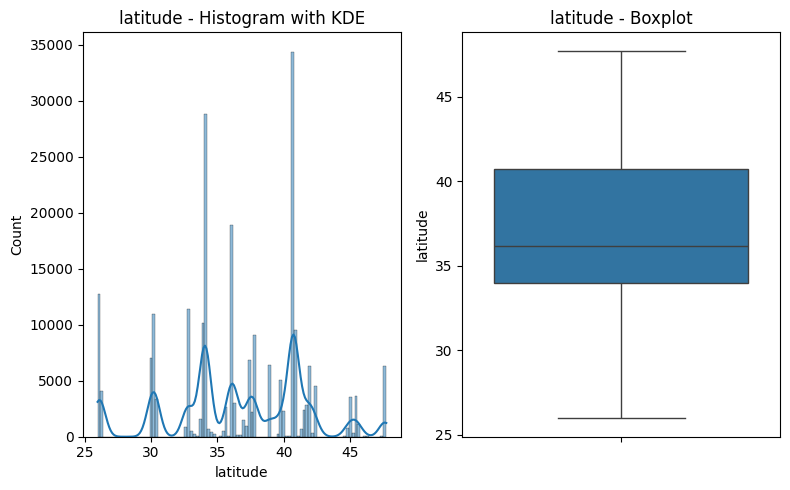

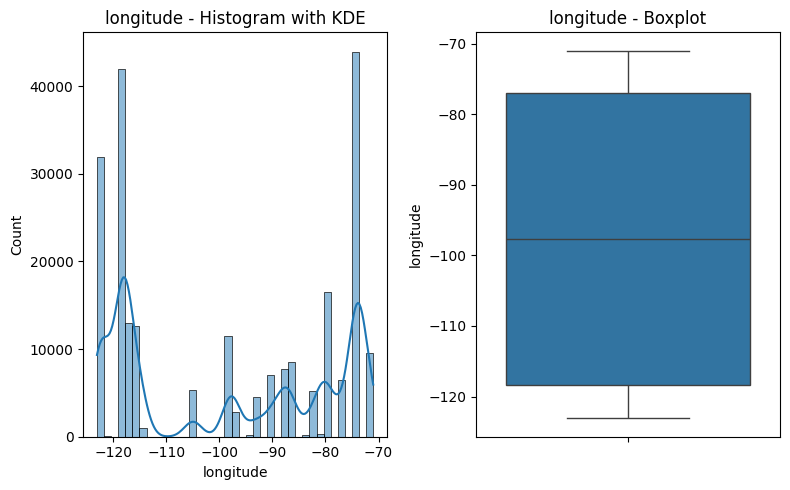

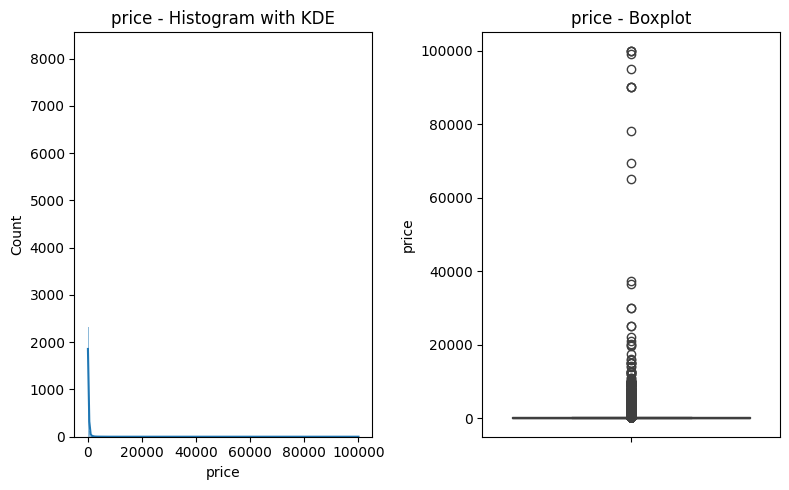

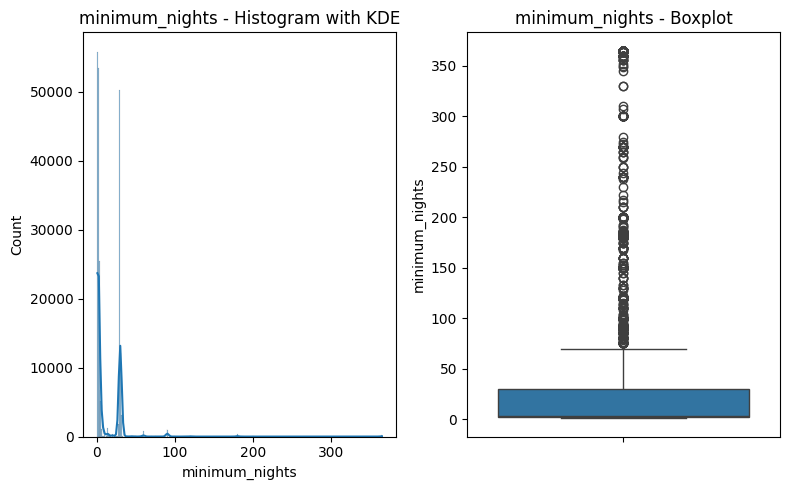

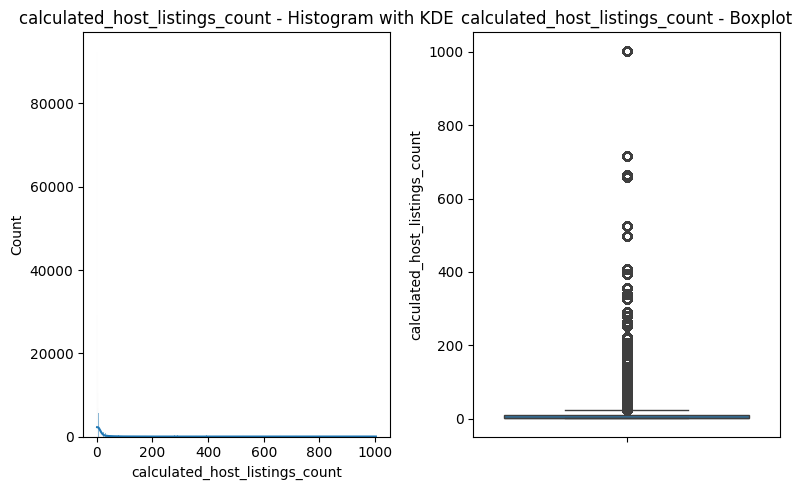

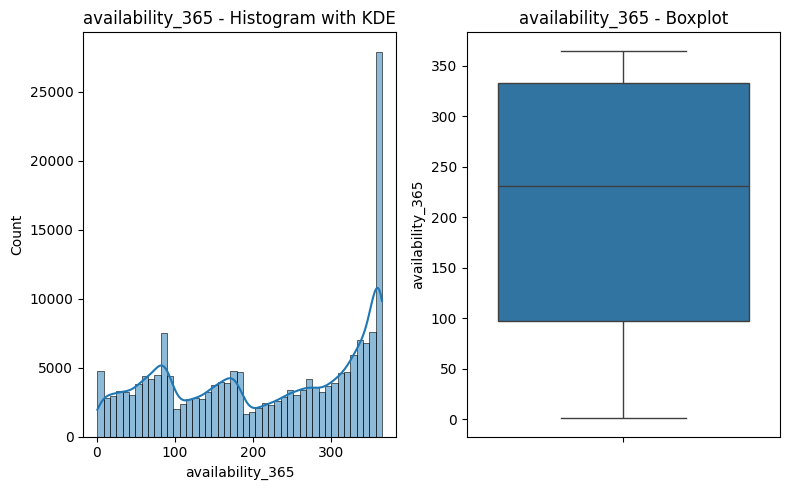

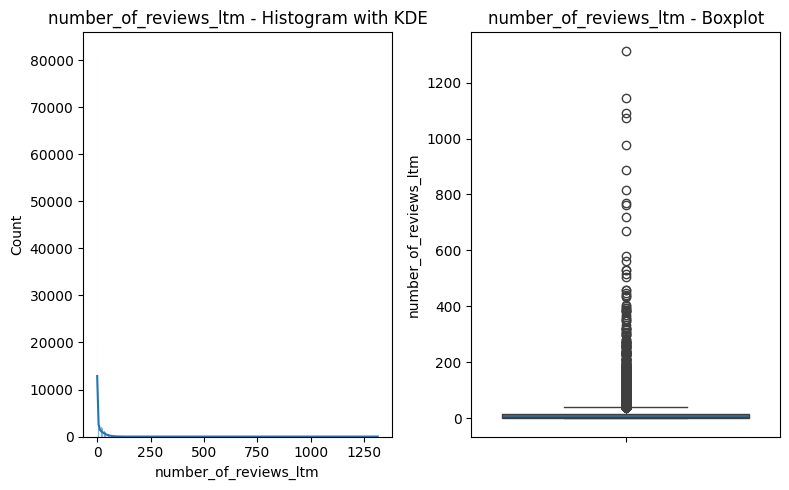

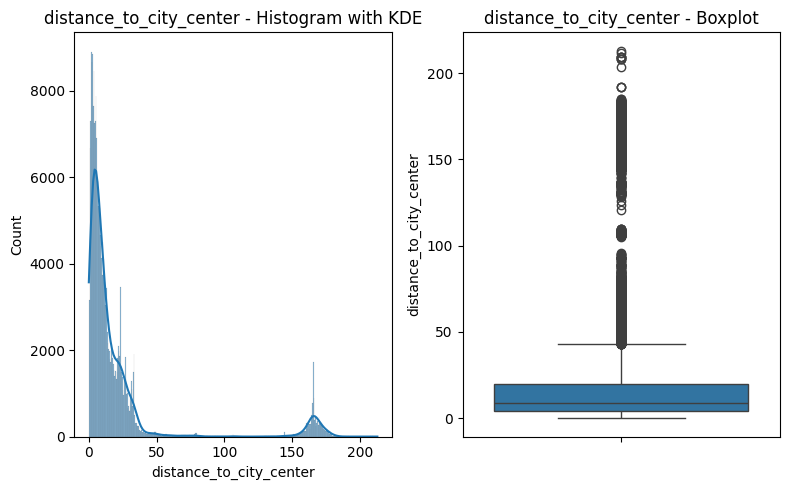

In [29]:
# uni-variate
num_cols = df.select_dtypes(include='number').columns

for col in num_cols:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,5))
    sns.histplot(df[col], kde=True, ax=axes[0])
    axes[0].set_title(f'{col} - Histogram with KDE')
    sns.boxplot(df[col], ax=axes[1])
    axes[1].set_title(f'{col} - Boxplot')
    plt.tight_layout()
    plt.show()


# price, minimum_nights, distance_to_city_center, calculated_host_listings_count, number_of_reviews_ltm: right skewed --> log


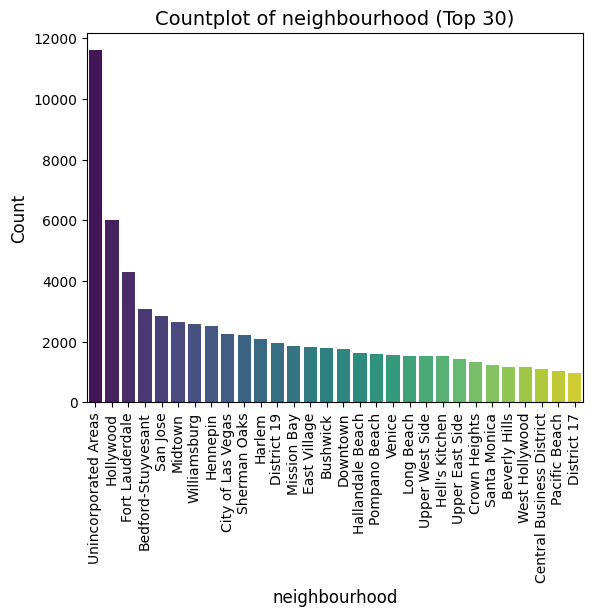

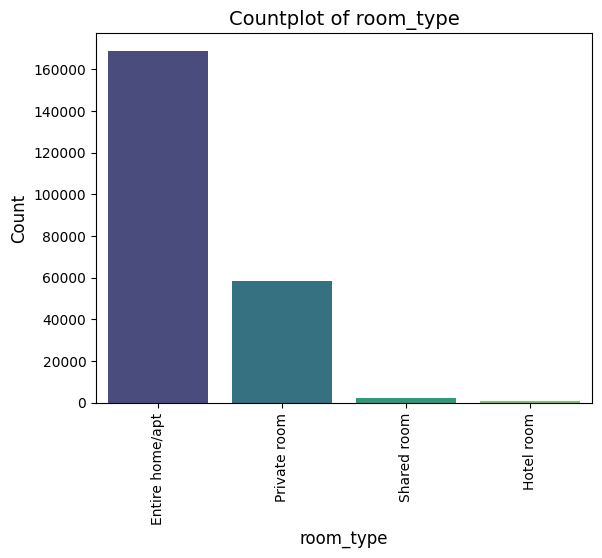

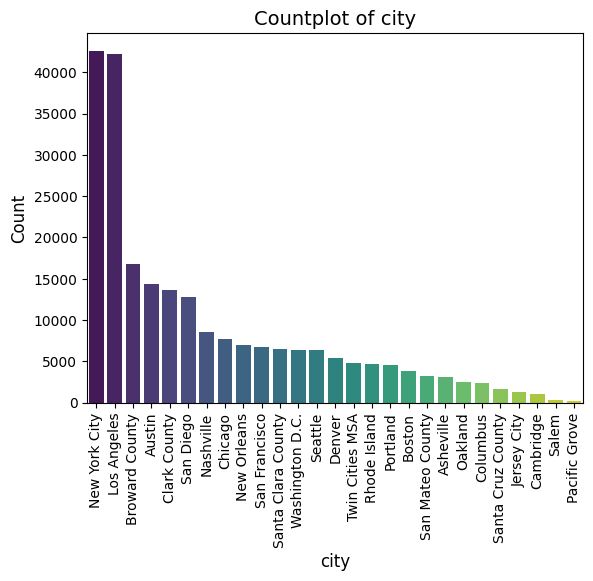

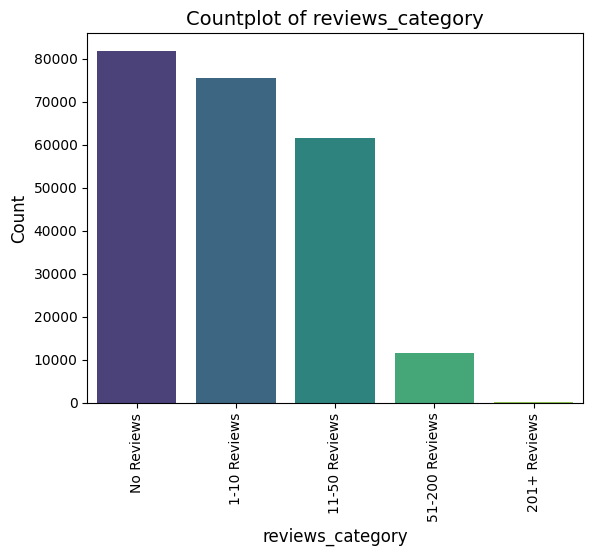

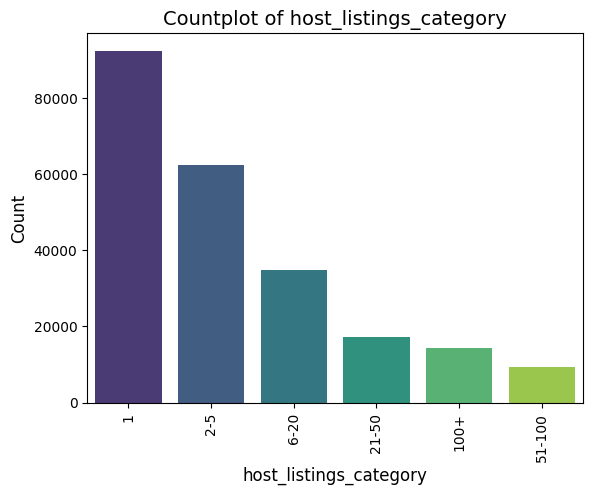

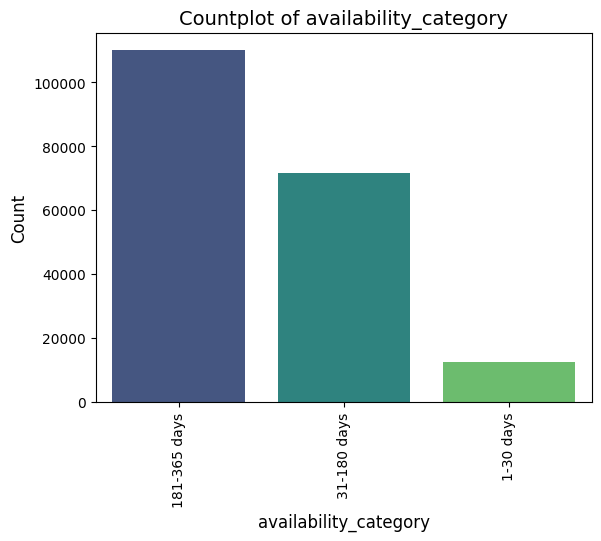

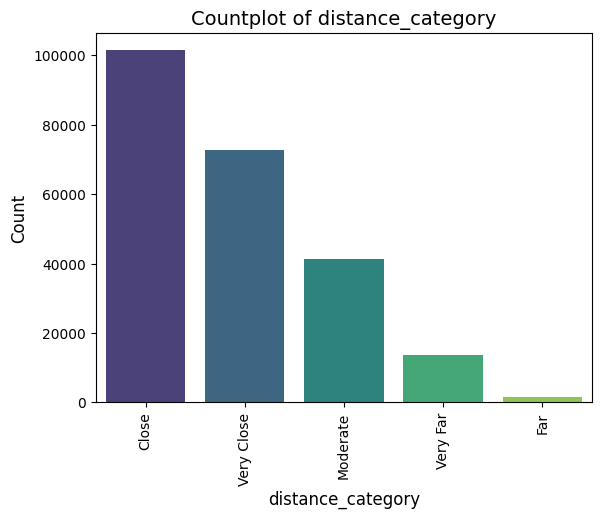

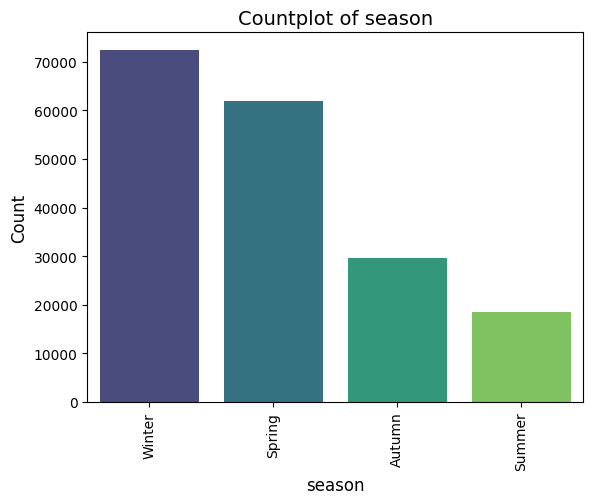

In [30]:
for column in df.select_dtypes(include="O").columns:
    plt.tight_layout()

    # Get the top 30 most frequent values
    top_30 = df[column].value_counts().head(30)

    sns.barplot(x=top_30.index, y=top_30.values, palette='viridis')
    if column == 'neighbourhood':
        plt.title(f'Countplot of {column} (Top 30)', fontsize=14)
    else:
        plt.title(f'Countplot of {column}', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=90)
    plt.show()


<Axes: >

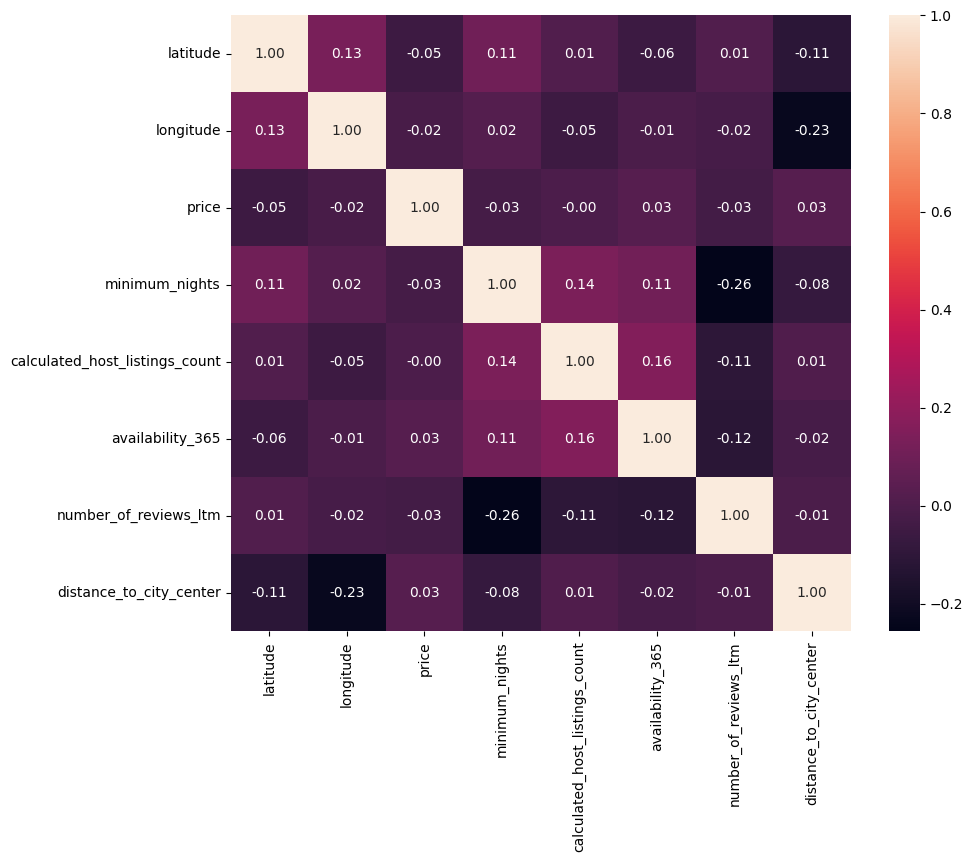

In [31]:
plt.figure(figsize=(10,8))
sns.heatmap(df.select_dtypes(include=['number']).corr(), fmt=".2f", annot=True)

1) What is the average price per room type?

In [32]:
(df.groupby("room_type")["price"].median() / df.groupby("room_type")["price"].median().sum() * 100).round(1).reset_index()

,room_type,price
0,Entire home/apt,31.6
1,Hotel room,47.6
2,Private room,13.4
3,Shared room,7.5


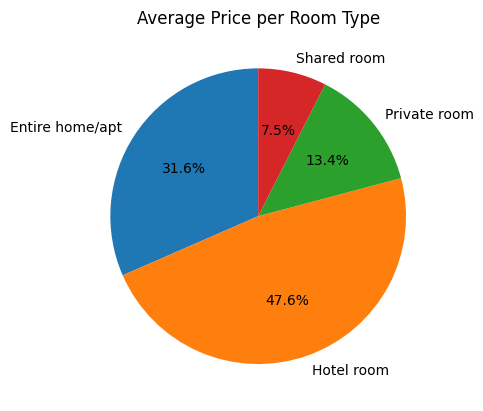

In [33]:
room_type_avg_price = df.groupby('room_type')['price'].median()
plt.pie(room_type_avg_price, labels=room_type_avg_price.index, autopct='%1.1f%%', startangle=90)
plt.title('Average Price per Room Type')
plt.show()


2) How does the price vary over time across different seasons?

In [34]:
(df.groupby([df['last_review'].dt.year, 'season'])['price']).median().unstack().reset_index()

season,last_review,Autumn,Spring,Summer,Winter
0,2010.0,150.0,NaN,NaN,NaN
1,2011.0,NaN,105.0,NaN,100.0
2,2012.0,193.5,175.0,100.0,164.0
3,2013.0,149.0,175.0,170.0,150.0
4,2014.0,147.5,159.0,150.0,121.0
5,2015.0,115.0,139.5,114.5,104.0
6,2016.0,118.5,120.0,100.0,106.0
7,2017.0,100.0,115.0,100.0,107.0
8,2018.0,110.0,100.0,106.0,102.0
9,2019.0,110.0,115.0,114.0,114.0


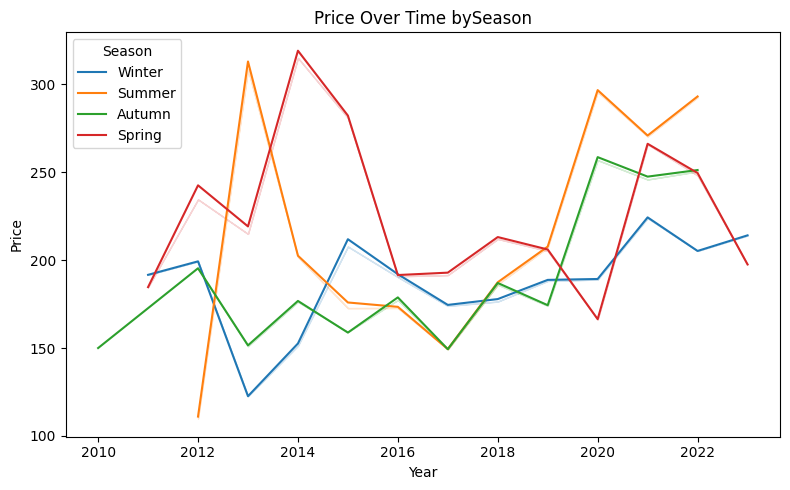

In [35]:
# Ensure 'last_review' is in datetime format
df['last_review'] = pd.to_datetime(df['last_review'])

# Extract the year and add it as a column
df_year= df['last_review'].dt.year

# Plot using Seaborn: No aggregation, just plot the raw price data
plt.figure(figsize=(8, 5))  # Optional: adjust the plot size
sns.lineplot(data=df, x=df_year, y='price', hue='season', ci=False)
plt.title('Price Over Time bySeason')
plt.ylabel('Price')
plt.xlabel('Year')
plt.legend(title='Season')  # Adjusting the legend location
plt.tight_layout()  # To make sure everything fits
plt.show()



3) How does the price of properties correlate with their availability for the year (availability_365)?

In [36]:
df.groupby('room_type')['availability_365'].describe()

,count,mean,std,min,25%,50%,75%,max
room_type,,,,,,,,
Entire home/apt,146683.0,213.379042,116.281778,1.0,106.00,228.0,327.0,365.0
Hotel room,787.0,182.302414,133.830416,3.0,35.00,204.0,309.0,365.0
Private room,45045.0,219.914885,127.221547,1.0,89.00,245.0,352.0,365.0
Shared room,1538.0,267.583875,119.994187,1.0,168.25,342.0,364.0,365.0


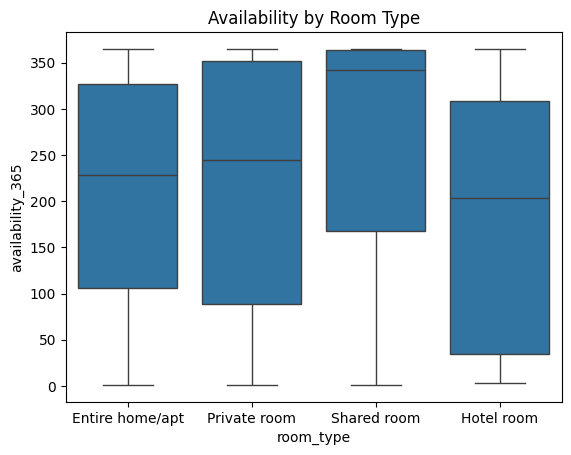

In [37]:
sns.boxplot(x='room_type', y='availability_365', data=df)
plt.title('Availability by Room Type')
plt.show()


4) Which are the top 10 neighborhoods with the highest number of listings, and how do the room types vary across these neighborhoods?

In [38]:
# Create a DataFrame for the top neighborhoods, including room_type information
top_neighbourhoods = df[df['neighbourhood'].isin(df['neighbourhood'].value_counts().head(10).index)]

# Group by 'neighbourhood' and 'room_type', then count the number of listings
top_neighbourhood_counts = (
    top_neighbourhoods.groupby(['neighbourhood', 'room_type'])
    .size()
    .unstack(fill_value=0)
    .reset_index()
)

# Add a column for the total listings per neighborhood
top_neighbourhood_counts['Total Listings'] = top_neighbourhood_counts.iloc[:, 1:].sum(axis=1)

top_neighbourhood_counts.sort_values('Total Listings',ascending=False)


room_type,neighbourhood,Entire home/apt,Hotel room,Private room,Shared room,Total Listings
8,Unincorporated Areas,8384,244,2921,47,11596
4,Hollywood,5216,22,677,78,5993
2,Fort Lauderdale,3838,16,423,9,4286
0,Bedford-Stuyvesant,1540,0,1498,40,3078
6,San Jose,1539,0,1254,45,2838
5,Midtown,1815,46,777,20,2658
9,Williamsburg,1459,0,1104,29,2592
3,Hennepin,1947,5,569,3,2524
1,City of Las Vegas,1660,7,562,13,2242
7,Sherman Oaks,347,0,1848,10,2205


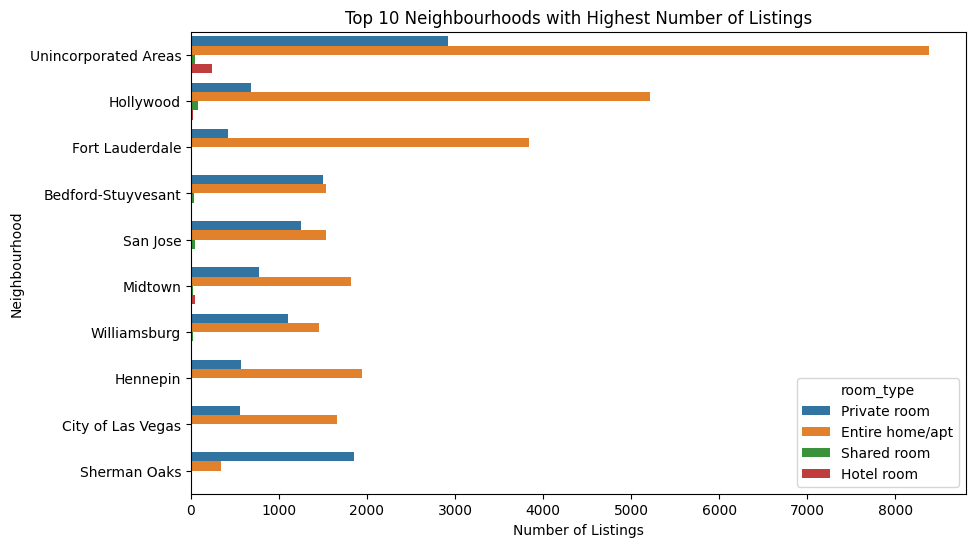

In [39]:
# Get the top 10 neighborhoods with the highest number of listings
neighbourhood_count = df['neighbourhood'].value_counts().head(10)

# Create a new DataFrame to use for the plot, including room_type information
top_neighbourhoods = df[df['neighbourhood'].isin(neighbourhood_count.index)]

# Plot using seaborn with 'room_type' as hue
plt.figure(figsize=(10,6))
sns.countplot(data=top_neighbourhoods, y='neighbourhood', hue='room_type', order=neighbourhood_count.index)
plt.title('Top 10 Neighbourhoods with Highest Number of Listings')
plt.xlabel('Number of Listings')
plt.ylabel('Neighbourhood')
plt.show()


5) What is the relationship between minimum nights and room type across different seasons?



In [40]:
df.groupby(['room_type', 'season'])['minimum_nights'].mean().reset_index()


,room_type,season,minimum_nights
0,Entire home/apt,Autumn,16.740441
1,Entire home/apt,Spring,6.022333
2,Entire home/apt,Summer,21.783501
3,Entire home/apt,Winter,10.054527
4,Hotel room,Autumn,3.254545
5,Hotel room,Spring,1.853503
6,Hotel room,Summer,3.444444
7,Hotel room,Winter,2.744493
8,Private room,Autumn,14.786106
9,Private room,Spring,8.016143


In [41]:
# Group by 'room_type' and 'season', then count the number of listings
room_type_counts = (
    df.groupby(['room_type', 'season'])['minimum_nights']
    .sum()  # Sum the 'minimum_nights' for each combination
    .unstack()  # Unstack to get 'season' as columns
    .reset_index()
)

# Add a column for the total of minimum nights per room_type and season
room_type_counts['Total minimum_nights'] = room_type_counts.iloc[:, 1:].sum(axis=1)

# Sort by the 'Total minimum_nights' column
room_type_counts = room_type_counts.sort_values('Total minimum_nights', ascending=False)

room_type_counts


season,room_type,Autumn,Spring,Summer,Winter,Total minimum_nights
0,Entire home/apt,337571,302562,281225,540833,1462191
2,Private room,131966,89380,102518,175858,499722
3,Shared room,5476,3390,4838,5141,18845
1,Hotel room,358,291,310,623,1582


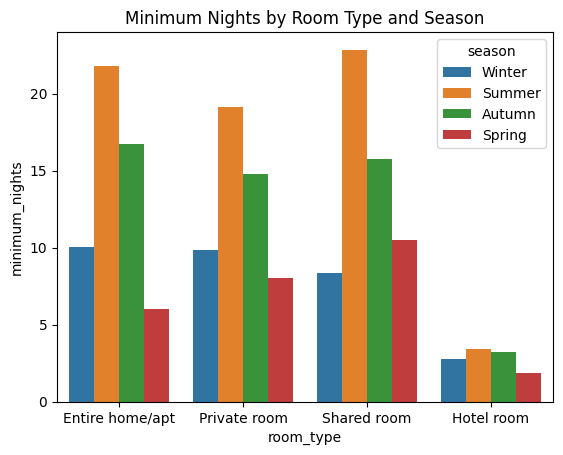

In [42]:
sns.barplot(x='room_type', y='minimum_nights', hue='season', data=df, ci=False)
plt.title('Minimum Nights by Room Type and Season')
plt.show()


6) What is the distribution of room types across cities?

room_type           Entire home/apt  Hotel room  Private room  Shared room
city                                                                      
Asheville                    2740.0        14.0         386.0          7.0
Austin                      11816.0         6.0        2382.0        107.0
Boston                       2526.0        19.0        1297.0         10.0
Broward County              14338.0        51.0        2338.0        107.0
Cambridge                     601.0         NaN         408.0          1.0
Chicago                      6029.0        29.0        1549.0         72.0
Clark County                 9919.0       251.0        3403.0         62.0
Columbus                     1942.0         6.0         384.0          5.0
Denver                       4535.0        12.0         773.0         27.0
Jersey City                   852.0        11.0         447.0          2.0
Los Angeles                 29390.0        62.0       12042.0        673.0
Nashville                

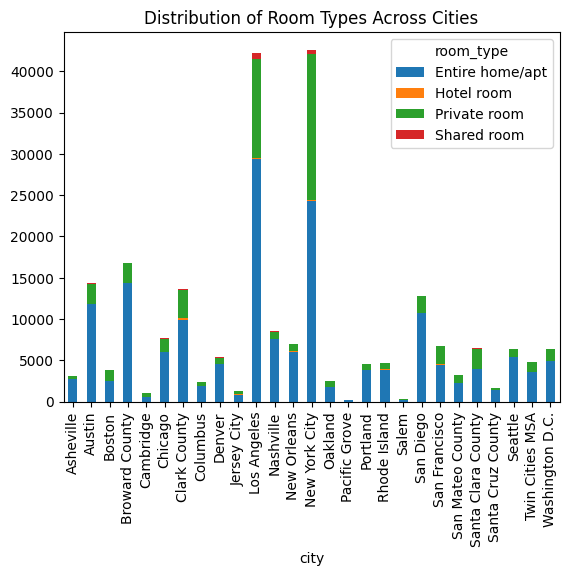

In [43]:
room_type_city = df.groupby('city')['room_type'].value_counts().unstack()
print(room_type_city)
room_type_city.plot(kind='bar', stacked=True)
plt.title('Distribution of Room Types Across Cities')
plt.show()


7) How does the price of accommodations vary over time by room type?

In [44]:
df.groupby([df['last_review'].dt.year, 'room_type'])['price'].median().unstack().reset_index()

room_type,last_review,Entire home/apt,Hotel room,Private room,Shared room
0,2010.0,150.0,NaN,NaN,NaN
1,2011.0,102.5,NaN,224.5,NaN
2,2012.0,200.0,NaN,90.0,NaN
3,2013.0,150.0,NaN,115.0,50.0
4,2014.0,177.0,NaN,80.0,30.0
5,2015.0,153.0,NaN,75.0,48.0
6,2016.0,150.0,1899.5,65.0,75.0
7,2017.0,150.0,261.5,65.0,50.0
8,2018.0,150.0,1663.0,69.0,41.5
9,2019.0,159.0,343.0,74.0,45.0


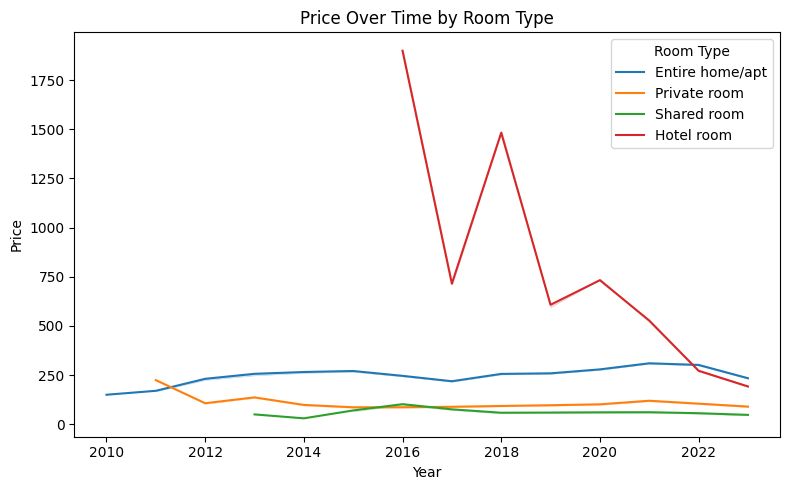

In [45]:
# Ensure 'last_review' is in datetime format
df['last_review'] = pd.to_datetime(df['last_review'])

# Extract the year and add it as a column
df_year = df['last_review'].dt.year

# Plot using Seaborn: No aggregation, just plot the raw price data
plt.figure(figsize=(8, 5))  # Optional: adjust the plot size
sns.lineplot(data=df, x=df_year, y='price', hue='room_type', ci=False)
plt.title('Price Over Time by Room Type')
plt.ylabel('Price')
plt.xlabel('Year')
plt.legend(title='Room Type')  # Adjusting the legend location
plt.tight_layout()  # To make sure everything fits
plt.show()


In [46]:
# latitude_l = df["latitude"].tolist()
# longitude_l = df["longitude"].tolist()
# locations = list(zip(latitude_l, longitude_l))

# # Initialize the map:
# usa_map = folium.Map(location = [35, -100], zoom_start = 5)
# plugins.FastMarkerCluster(data = locations).add_to(usa_map)
# usa_map

In [47]:
# import folium
# from folium import plugins

# # Extract latitude and longitude as lists
# latitude_l = df["latitude"].tolist()
# longitude_l = df["longitude"].tolist()

# # Combine them into a list of tuples (latitude, longitude)
# locations = list(zip(latitude_l, longitude_l))

# # Initialize the map (centered on the USA)
# usa_map = folium.Map(location=[35, -100], zoom_start=5)

# # Create the FastMarkerCluster with the location data
# marker_cluster = plugins.FastMarkerCluster(data=locations).add_to(usa_map)

# # Add markers with popups containing the required information
# for index, row in df.iterrows():
#     popup_text = f"""
#     <b>Room Type:</b> {row['room_type']}<br>
#     <b>Price:</b> ${row['price']}<br>
#     <b>Minimum Nights:</b> {row['minimum_nights']}<br>
#     <b>Availability (365 days):</b> {row['availability_365']}<br>
#     <b>City:</b> {row['city']}<br>
#     <b>Distance to City Center:</b> {row['distance_to_city_center']} km
#     """
#     folium.Marker(
#         location=[row['latitude'], row['longitude']],
#         popup=popup_text
#     ).add_to(marker_cluster)

# # Display the map
# display(usa_map)

# # Save the map as an HTML file
# usa_map.save("usa_map.html")

In [48]:
import folium
from folium import plugins

# Filter out rows with null values in key columns
df_clean = df.dropna(subset=['latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'availability_365', 'city', 'distance_to_city_center'])

# Extract latitude and longitude as lists
latitude_l = df_clean["latitude"].tolist()
longitude_l = df_clean["longitude"].tolist()

# Combine them into a list of tuples (latitude, longitude)
locations = list(zip(latitude_l, longitude_l))

# Initialize the map (centered on the USA)
usa_map = folium.Map(location=[35, -100], zoom_start=5)

# Create the FastMarkerCluster with the location data
marker_cluster = plugins.FastMarkerCluster(data=locations).add_to(usa_map)

# Add markers with popups containing the required information
for index, row in df_clean.iterrows():
    popup_text = f"""
    <b>Room Type:</b> {row['room_type']}<br>
    <b>Price:</b> ${row['price']}<br>
    <b>Minimum Nights:</b> {row['minimum_nights']}<br>
    <b>Availability (365 days):</b> {row['availability_365']}<br>
    <b>City:</b> {row['city']}<br>
    <b>Distance to City Center:</b> {row['distance_to_city_center']} km
    """
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=popup_text
    ).add_to(marker_cluster)

# Display the map (if you're running this in a Jupyter Notebook or other IPython environment)
# display(usa_map)

# Save the map as an HTML file
usa_map.save("usa_map.html")


<Axes: >

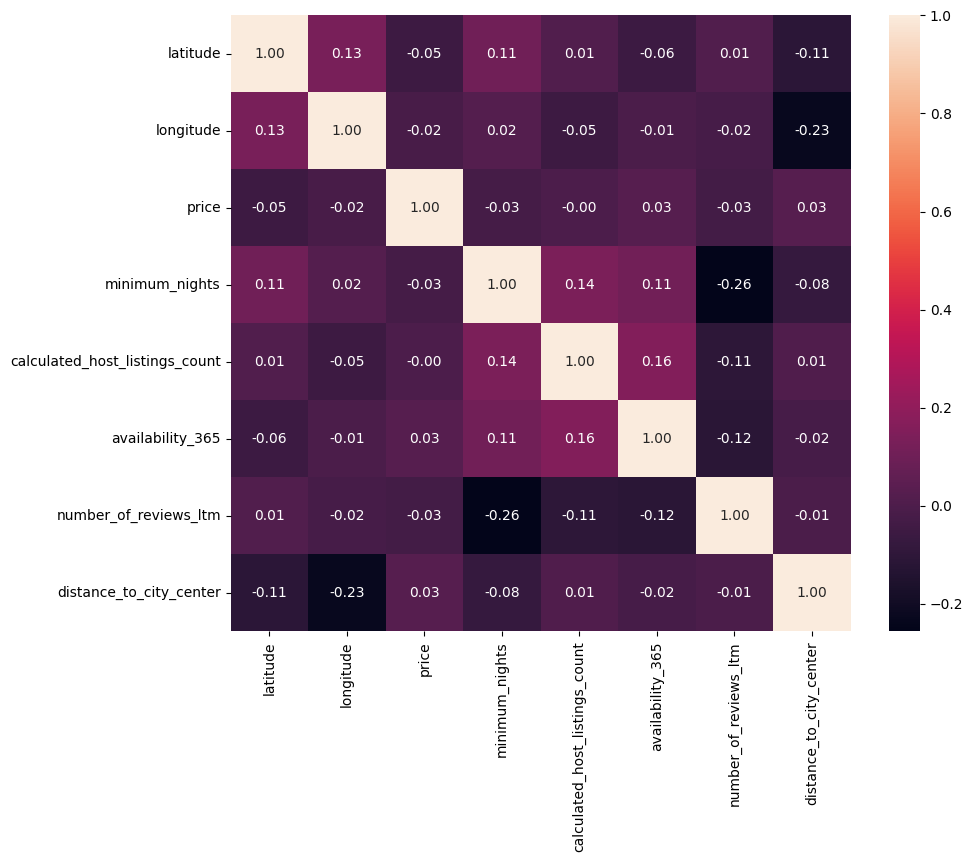

In [49]:
plt.figure(figsize=(10,8))
sns.heatmap(df.select_dtypes(include=['number']).corr(), fmt=".2f", annot=True)

### 3) Pre-Processing Mind Map:
* a) Detect & Handle Duplicates
* b) train_test_split
* c) Detect & Handle NaNs
* d) Detect & Handle Outliers
* e) Encoding: (Ordinal:[OrdinalEncoder, LabelEncoder] - Nominal: [< 7 uniques(OneHotEncoding), > 7 uniques (BinaryEncoder)])
* f) Scaling: StandardScaler, MinMaxScaler, RobustScaler: X_train_resampled_scaled

In [32]:
# a) Detect & Handle Duplicates
df.duplicated().sum()

671

In [33]:
df.drop_duplicates(inplace=True)
df.reset_index(inplace=True, drop=True)
df.duplicated().sum()

0

In [34]:
from sklearn.cluster import KMeans

# b) train_test_split
X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

# Fit KMeans only on the training data
kmeans = KMeans(n_clusters=5, random_state=42)
X_train['location_cluster'] = kmeans.fit_predict(X_train[['latitude', 'longitude']])

# Predict clusters for the test data using the fitted KMeans model
X_test['location_cluster'] = kmeans.predict(X_test[['latitude', 'longitude']])

X_train.shape, X_test.shape

((183902, 17), (45976, 17))

In [35]:
X_train

,neighbourhood,latitude,longitude,room_type,minimum_nights,last_review,calculated_host_listings_count,availability_365,number_of_reviews_ltm,city,distance_to_city_center,reviews_category,host_listings_category,availability_category,distance_category,season,location_cluster
1717,Chinatown,37.79143,-122.40824,Private room,2,2022-09-22,15,365.0,1,San Francisco,2.081491,1-10 Reviews,6-20,181-365 days,Very Close,Autumn,1
149831,Hale,39.73512,-104.92318,Entire home/apt,2,2023-03-24,1,121.0,35,Denver,5.771357,11-50 Reviews,1,31-180 days,Close,Spring,2
150997,Five Points,39.75426,-104.98770,Entire home/apt,30,2022-09-04,1,358.0,1,Denver,1.686892,1-10 Reviews,1,181-365 days,Very Close,Autumn,2
116907,<NA>,35.43403,-82.52393,Private room,1,2022-10-10,2,27.0,28,Asheville,18.044873,11-50 Reviews,2-5,1-30 days,Close,Autumn,4
15597,Ward C (councilmember Richard Boggiano),40.72832,-74.06308,Entire home/apt,28,2022-01-31,1,230.0,0,Jersey City,2.052860,No Reviews,1,181-365 days,Very Close,Winter,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,Northland,40.06863,-82.97149,Entire home/apt,2,2023-03-26,1,76.0,28,Columbus,12.154218,11-50 Reviews,1,31-180 days,Close,Spring,4
103694,Flatiron District,40.74252,-73.98699,Entire home/apt,2,2023-02-12,53,354.0,3,New York City,3.670364,1-10 Reviews,51-100,181-365 days,Very Close,Winter,0
131932,Mission Bay,32.78937,-117.24114,Entire home/apt,1,2023-01-07,12,266.0,7,San Diego,11.091037,1-10 Reviews,6-20,181-365 days,Close,Winter,1
146867,District 11,36.25689,-86.65087,Entire home/apt,30,NaT,3,261.0,0,Nashville,15.730053,No Reviews,2-5,181-365 days,Close,None,4


In [36]:
# c) Detect & Handle NaNs (No NaNs)
X_train.isna().sum()

neighbourhood                     13886
latitude                              0
longitude                             0
room_type                             0
minimum_nights                        0
last_review                       38127
calculated_host_listings_count        0
availability_365                  29154
number_of_reviews_ltm                 0
city                                  0
distance_to_city_center               0
reviews_category                      0
host_listings_category                0
availability_category             29154
distance_category                    10
season                            38127
location_cluster                      0
dtype: int64

In [37]:
from sklearn.base import BaseEstimator, TransformerMixin

class Handle_outliers_lb_ub(BaseEstimator, TransformerMixin):
    # Initialize custom transformer to handle outliers using IQR method
    def fit(self, X, y=None):
        # Store number of features and calculate IQR bounds
        self.n_features_in_ = X.shape[1]
        q1 = np.percentile(X, 25)
        q3 = np.percentile(X, 75)
        iqr = q3 - q1
        self.ub_train = q3 + 1.5 * iqr  # Upper bound
        self.lb_train = q1 - 1.5 * iqr  # Lower bound
        return self

    def transform(self, X, y=None):
        # Validate number of features and cap outliers
        assert self.n_features_in_ == X.shape[1]
        X[X > self.ub_train] = self.ub_train
        X[X < self.lb_train] = self.lb_train
        return X

h_lb_ub = Handle_outliers_lb_ub()  # Create instance of the transformer
h_lb_ub  # Display the instance

Handle_outliers_lb_ub()

In [38]:
from sklearn.base import BaseEstimator, TransformerMixin

class LogTransfomer(BaseEstimator, TransformerMixin):
    # Initialize custom transformer for log transformation
    def fit(self, x, y=None):
        # Store number of features for validation
        self.n_features_in_ = x.shape[1]
        return self  # Always return self

    def transform(self, x, y=None):
        # Validate feature count and apply log1p transformation
        assert self.n_features_in_ == x.shape[1]
        return np.log1p(x)

log_transformer = LogTransfomer()  # Create instance of the transformer
log_transformer  # Display the instance

LogTransfomer()

In [39]:
# c) Detect & Handle NaNs
# d) Detect & Handle Outliers
# e) Encoding: (Ordinal:[OrdinalEncoder, LabelEncoder] - Nominal: [< 7 uniques(OneHotEncoding), > 7 uniques (BinaryEncoder)])
# f) Scaling: StandardScaler, MinMaxScaler, RobustScaler: X_train_resampled_scaled

# Replace pd.NA with NaN before applying SimpleImputer or KNNImputer
def replace_pdna(X):
    """Replaces pd.NA values with np.nan."""
    return X.replace({pd.NA: np.nan})

# Define pipelines with consistent preprocessing steps
num_knn_lb_ub_ro_pipeline = Pipeline(steps=[
    ('impute', KNNImputer(n_neighbors=5)),  # Impute missing values with KNN
    ('handle_outliers', Handle_outliers_lb_ub()),  # Handle outliers using IQR
    ('scale', RobustScaler())  # Scale data with RobustScaler
])

date_knn_pipeline = Pipeline(steps=[
    ('knn_imputer', KNNImputer(n_neighbors=5))  # Impute missing dates with KNN
])

cat_si_ohe_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),  # Impute with most frequent value
    ('encode', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'))  # One-hot encode
])

cat_si_bi_pipeline = Pipeline(steps=[
    ('replace_pdna', FunctionTransformer(replace_pdna)),  # Replace pd.NA with NaN
    ('impute', SimpleImputer(strategy='most_frequent')),  # Impute with most frequent value
    ('encode', category_encoders.BinaryEncoder())  # Binary encode
])

cat_si_or_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),  # Impute with most frequent value
    ('encode', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))  # Ordinal encode
])

# Applying LabelEncoder with reshape for 2D output (if necessary)
cat_si_la_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),  # Impute with most frequent value
    ('encode', FunctionTransformer(lambda x: LabelEncoder().fit_transform(x.astype(str)).reshape(-1, 1)))  # Label encode
])

num_si_log_ro_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='median')),  # Impute with median
    ('log_transform', LogTransfomer()),  # Apply log transformation
    ('scale', RobustScaler())  # Scale data with RobustScaler
])

target_pipeline = Pipeline(steps=[
    # Assuming 'log_transformer' is defined elsewhere and performs log transformation
    ('handle_outliers', log_transformer)  # Handle outliers with log transformer
])

In [40]:
# Define the column transformer with the necessary pipelines
pre_processing = ColumnTransformer(transformers=[
    ("num_knn_lb_ub_ro_pipeline", num_knn_lb_ub_ro_pipeline, ['availability_365', 'latitude', 'longitude']),  # Numeric pipeline for availability and coordinates
    ("date_knn_pipeline", date_knn_pipeline, ['last_review']),  # Date pipeline for last review
    ("cat_si_ohe_pipeline", cat_si_ohe_pipeline, ['room_type']),  # One-hot encoding for room type
    ("cat_si_bi_pipeline", cat_si_bi_pipeline, ['neighbourhood', 'city']),  # Binary encoding for neighbourhood and city
    ("cat_si_or_pipeline", cat_si_or_pipeline, ['distance_category', 'reviews_category', 'season']),  # Ordinal encoding for categories and season
    ("cat_si_la_pipeline_availability", cat_si_la_pipeline, ['availability_category']),  # Label encoding for availability category
    ("cat_si_la_pipeline_host_listings", cat_si_la_pipeline, ['host_listings_category']),  # Label encoding for host listings category
    ("num_si_log_ro_pipeline", num_si_log_ro_pipeline, ['minimum_nights', 'calculated_host_listings_count', 'number_of_reviews_ltm', 'distance_to_city_center'])  # Numeric pipeline with log transform
])
pre_processing  # Display the column transformer

ColumnTransformer(transformers=[('num_knn_lb_ub_ro_pipeline',
                                 Pipeline(steps=[('impute', KNNImputer()),
                                                 ('handle_outliers',
                                                  Handle_outliers_lb_ub()),
                                                 ('scale', RobustScaler())]),
                                 ['availability_365', 'latitude', 'longitude']),
                                ('date_knn_pipeline',
                                 Pipeline(steps=[('knn_imputer',
                                                  KNNImputer())]),
                                 ['last_review']),
                                ('cat_si_ohe_pipeline',
                                 Pipeline(steps=[('impute'...
                                                 ('encode',
                                                  FunctionTransformer(func=<function <lambda> at 0x7c7df57f30a0>))]),
                                 ['host_listings_category']),
                                ('num_si_log_ro_pipeline',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('log_transform',
                                                  LogTransfomer()),
                                                 ('scale', RobustScaler())]),
                                 ['minimum_nights',
                                  'calculated_host_listings_count',
                                  'number_of_reviews_ltm',
                                  'distance_to_city_center'])])

# 4) Modeling

* 1) Make Simple Model

* 2) Get validation accuracy to invstigate (Underfitting vs Overfitting)

* 3) Hyperparameters tunning (using GridSearchCV or RandomizedSearchCV)

* 4) Get Test Score & confidence interval

* 5) save model

* 6) put it in backend (streamlit / flaskapp)

In [41]:
# Apply preprocessing to training and testing features
X_train_preprocessed = pre_processing.fit_transform(X_train)
X_test_preprocessed = pre_processing.transform(X_test)

# Encode the target labels for training and testing sets
y_train_preprocessed = target_pipeline.fit_transform(np.array(y_train).reshape(-1, 1)).ravel()
y_test_preprocessed = target_pipeline.transform(np.array(y_test).reshape(-1, 1)).ravel()

# Display preprocessed training features
X_train_preprocessed


array([[ 0.70821256,  0.23713718, -0.59774902, ...,  0.98194944,
        -0.24465054, -0.80283595],
       [-0.4705314 ,  0.52531063, -0.17429119, ..., -0.23784459,
         0.77552387, -0.24870255],
       [ 0.67439614,  0.52814835, -0.17585375, ..., -0.23784459,
        -0.24465054, -0.89928345],
       ...,
       [ 0.22995169, -0.5044733 , -0.47261082, ...,  0.86014883,
         0.24465054,  0.15936419],
       [ 0.2057971 ,  0.00962473,  0.26823248, ...,  0.16875342,
        -0.48930108,  0.38793433],
       [ 0.51980676,  0.78658805,  0.63974214, ...,  0.        ,
         1.11428263,  0.73481063]])

In [60]:
# Create a linear regression model
lr_model = LinearRegression()

# Train the model using preprocessed training data
lr_model.fit(X_train_preprocessed, y_train_preprocessed)

# Predict on the training data
y_train_pred = lr_model.predict(X_train_preprocessed)

# Print R² score and mean squared error for training data
print(f"Train Accuracy: {lr_model.score(X_train_preprocessed, y_train_preprocessed)}")
print(f"Train Loss: {mean_squared_error(y_train_preprocessed, y_train_pred)}")

# Perform 5-fold cross-validation and display statistics of R² scores
valid_accuracies = cross_val_score(lr_model, X_train_preprocessed, y_train_preprocessed, cv=5, scoring='r2')
pd.DataFrame(valid_accuracies).describe()


Train Accuracy: 0.005487384158119224
Train Loss: 0.6274360270544361


,0
count,5.000000
mean,0.005449
std,0.000578
min,0.004670
25%,0.005320
50%,0.005365
75%,0.005620
max,0.006270


In [71]:
# Replace pd.NA with NaN before applying SimpleImputer or KNNImputer
def replace_pdna(X):
    """Replaces pd.NA values with np.nan."""
    return X.fillna(pd.NA).replace({pd.NA: float('nan')})

# Pipeline for numerical data: KNN imputation, polynomial features, outlier handling, and robust scaling
num_knn_lb_ub_ro_pipeline = Pipeline(steps=[
    ('impute', KNNImputer(n_neighbors=5)),
    ('poly', PolynomialFeatures(degree=5, include_bias=True)),
    ('handle_outliers', Handle_outliers_lb_ub()),
    ('scale', RobustScaler())
])

# Pipeline for date columns using KNN imputer
date_knn_pipeline = Pipeline(steps=[
    ('knn_imputer', KNNImputer(n_neighbors=5))
])

# Pipeline for categorical data: simple imputation and one-hot encoding
cat_si_ohe_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('encode', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'))
])

# Pipeline for categorical data: replace pd.NA, simple imputation, and binary encoding
cat_si_bi_pipeline = Pipeline(steps=[
    ('replace_pdna', FunctionTransformer(replace_pdna)),
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('encode', category_encoders.BinaryEncoder())
])

# Pipeline for categorical data: simple imputation and ordinal encoding
cat_si_or_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('encode', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

# Pipeline for categorical data: simple imputation and label encoding with reshaping
cat_si_la_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('encode', FunctionTransformer(lambda x: LabelEncoder().fit_transform(x.astype(str)).reshape(-1, 1)))
])

# Pipeline for numerical data: median imputation, polynomial features, log transformation, and robust scaling
num_si_log_ro_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='median')),
    ('poly', PolynomialFeatures(degree=5, include_bias=True)),
    ('log_transform', LogTransfomer()),
    ('scale', RobustScaler())
])

# Pipeline for target variable: apply log transformation and handle outliers
target_pipeline = Pipeline(steps=[
    ('handle_outliers', log_transformer)  # assumes log_transformer is defined elsewhere
])


In [72]:
# Preprocessing different columns using appropriate pipelines
pre_processing_poly = ColumnTransformer(transformers=[
    ("num_knn_lb_ub_ro_pipeline", num_knn_lb_ub_ro_pipeline, ['availability_365', 'latitude', 'longitude']),  # Numeric features
    ("date_knn_pipeline", date_knn_pipeline, ['last_review']),  # Date feature
    ("cat_si_ohe_pipeline", cat_si_ohe_pipeline, ['room_type']),  # One-hot encode
    ("cat_si_bi_pipeline", cat_si_bi_pipeline, ['neighbourhood', 'city']),  # Binary encode
    ("cat_si_or_pipeline", cat_si_or_pipeline, ['distance_category', 'reviews_category', 'season']),  # Ordinal encode
    ("cat_si_la_pipeline_availability", cat_si_la_pipeline, ['availability_category']),  # Label encode
    ("cat_si_la_pipeline_host_listings", cat_si_la_pipeline, ['host_listings_category']),  # Label encode
    ("num_si_log_ro_pipeline", num_si_log_ro_pipeline, ['minimum_nights', 'calculated_host_listings_count', 'number_of_reviews_ltm', 'distance_to_city_center'])  # Log scale numeric
])

pre_processing_poly


ColumnTransformer(transformers=[('num_knn_lb_ub_ro_pipeline',
                                 Pipeline(steps=[('impute', KNNImputer()),
                                                 ('poly',
                                                  PolynomialFeatures(degree=5)),
                                                 ('handle_outliers',
                                                  Handle_outliers_lb_ub()),
                                                 ('scale', RobustScaler())]),
                                 ['availability_365', 'latitude', 'longitude']),
                                ('date_knn_pipeline',
                                 Pipeline(steps=[('knn_imputer',
                                                  KNNImputer())]),
                                 ['last_review']),
                                ('cat_si_o...
                                                  FunctionTransformer(func=<function <lambda> at 0x7d8c85d1d480>))]),
                                 ['host_listings_category']),
                                ('num_si_log_ro_pipeline',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('poly',
                                                  PolynomialFeatures(degree=5)),
                                                 ('log_transform',
                                                  LogTransfomer()),
                                                 ('scale', RobustScaler())]),
                                 ['minimum_nights',
                                  'calculated_host_listings_count',
                                  'number_of_reviews_ltm',
                                  'distance_to_city_center'])])

In [73]:
# Apply preprocessing to training and test features
X_train_preprocessed_poly = pre_processing_poly.fit_transform(X_train)
X_test_preprocessed_poly = pre_processing_poly.transform(X_test)

# Apply preprocessing to target variable
y_train_preprocessed = target_pipeline.fit_transform(np.array(y_train).reshape(-1, 1))
y_test_preprocessed = target_pipeline.transform(np.array(y_test).reshape(-1, 1))

# Show preprocessed training features
X_train_preprocessed_poly


array([[ 0.        ,  0.70821256,  0.23713718, ..., -0.43893307,
        -0.35220897, -0.88878599],
       [ 0.        , -0.4705314 ,  0.52531063, ...,  0.38741623,
         0.26562928, -0.25290441],
       [ 0.        ,  0.67439614,  0.52814835, ..., -0.48380247,
        -0.41545671, -1.01480946],
       ...,
       [ 0.        ,  0.22995169, -0.5044733 , ...,  0.28403651,
         0.34739102,  0.15639594],
       [ 0.        ,  0.2057971 ,  0.00962473, ..., -0.62812792,
        -0.59536268,  0.37535454],
       [ 0.        ,  0.51980676,  0.78658805, ...,  0.92224642,
         0.84062348,  0.69947464]])

In [74]:
# Initialize linear regression model
lr_model = LinearRegression()

# Train the model on polynomial-transformed training data
lr_model.fit(X_train_preprocessed_poly, y_train_preprocessed)

# Predict target values for the training set
y_train_pred = lr_model.predict(X_train_preprocessed_poly)

# Print R² score (accuracy) and mean squared error (loss) on training data
print(f"Train Accuracy: {lr_model.score(X_train_preprocessed_poly, y_train_preprocessed)}")
print(f"Train Loss: {mean_squared_error(y_train_preprocessed, y_train_pred)}")

# Perform 5-fold cross-validation and show R² scores statistics
valid_accuracies = cross_val_score(lr_model, X_train_preprocessed_poly, y_train_preprocessed, cv=5, scoring='r2')
pd.DataFrame(valid_accuracies).describe()


Train Accuracy: 0.005487384158119224
Train Loss: 0.6274360270544361


,0
count,5.000000
mean,0.005477
std,0.000575
min,0.004718
25%,0.005348
50%,0.005411
75%,0.005586
max,0.006321


In [75]:
# Lasso Regression
lasso_reg = Lasso(alpha=0.1, random_state=42, max_iter=5000)
lasso_reg.fit(X_train_preprocessed, y_train_preprocessed)  # Fit model
y_train_pred_lasso = lasso_reg.predict(X_train_preprocessed)  # Predict on train data

# Print training accuracy and loss
print(f"Lasso Train Accuracy (R²): {lasso_reg.score(X_train_preprocessed, y_train_preprocessed)}")
print(f"Lasso Train Loss (MSE): {mean_squared_error(y_train_preprocessed, y_train_pred_lasso)}")

# Cross-validation scores
valid_accuracies_lasso = cross_val_score(lasso_reg, X_train_preprocessed, y_train_preprocessed, cv=5, scoring='r2')
print("Lasso Cross-validation R² scores:")
print(pd.DataFrame(valid_accuracies_lasso).describe())


Lasso Train Accuracy (R²): 0.14051703678516625
Lasso Train Loss (MSE): 0.5422460883555337
Lasso Cross-validation R² scores:
              0
count  5.000000
mean   0.140466
std    0.000729
min    0.139386
25%    0.140084
50%    0.140705
75%    0.141012
max    0.141144


In [35]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid for Lasso
lasso_param_grid = {"alpha": [0.01, 0.1, 0.02, 1.0, 2.0, 5.0, 10.0]}

# Grid search with cross-validation
lasso_grid_search = GridSearchCV(
    Lasso(max_iter=20000, tol=1e-3),
    param_grid=lasso_param_grid,
    cv=5,
    scoring="r2",
    verbose=1,
    n_jobs=-1
)

# Fit model to find best alpha
lasso_grid_search.fit(X_train_preprocessed, y_train_preprocessed)

# Print best parameters and best score
print("Lasso Best Params:", lasso_grid_search.best_params_)
print("Lasso Best Score:", lasso_grid_search.best_score_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


/usr/local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.089e+04, tolerance: 9.283e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.845e+04, tolerance: 9.270e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.859e+04, tolerance: 9.283e

Lasso Best Params: {'alpha': 0.01}
Lasso Best Score: 0.29744175465919576


In [79]:
# Ridge Regression
ridge_reg = Ridge(alpha=1.0, random_state=42, max_iter=5000)
ridge_reg.fit(X_train_preprocessed, y_train_preprocessed)  # Train model
y_train_pred_ridge = ridge_reg.predict(X_train_preprocessed)  # Predict on training data

# Print training accuracy and loss
print(f"Ridge Train Accuracy (R²): {ridge_reg.score(X_train_preprocessed, y_train_preprocessed)}")
print(f"Ridge Train Loss (MSE): {mean_squared_error(y_train_preprocessed, y_train_pred_ridge)}")

# Cross-validation scores
valid_accuracies_ridge = cross_val_score(ridge_reg, X_train_preprocessed, y_train_preprocessed, cv=5, scoring='r2')
print("Ridge Cross-validation R² scores:")
print(pd.DataFrame(valid_accuracies_ridge).describe())


Ridge Train Accuracy (R²): 0.3275522673646485
Ridge Train Loss (MSE): 0.4242459341848813
Ridge Cross-validation R² scores:
              0
count  5.000000
mean   0.327267
std    0.003894
min    0.322559
25%    0.325823
50%    0.326011
75%    0.329049
max    0.332894


In [82]:
# Ridge hyperparameter tuning using GridSearchCV
ridge_param_grid = {"alpha": [0.1, 1, 2, 2.5, 3, 4, 5, 10, 50]}
ridge_grid_search = GridSearchCV(Ridge(), param_grid=ridge_param_grid, cv=5, scoring="r2", verbose=1, n_jobs=-1)

ridge_grid_search.fit(X_train_preprocessed, y_train_preprocessed)  # Fit grid search

# Print best hyperparameters and best cross-validation score
print("Ridge Best Params:", ridge_grid_search.best_params_)
print("Ridge Best Score:", ridge_grid_search.best_score_)


Fitting 5 folds for each of 9 candidates, totalling 45 fits


/usr/local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.66408e-40): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.6911e-40): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.65063e-40): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.68779e-40): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning

Ridge Best Params: {'alpha': 2}
Ridge Best Score: 0.32726712922224493


In [83]:
# ElasticNet Regression
elasticnet_reg = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42, max_iter=5000)
elasticnet_reg.fit(X_train_preprocessed, y_train_preprocessed)  # Train model
y_train_pred_elasticnet = elasticnet_reg.predict(X_train_preprocessed)  # Predict on train set

# Print training accuracy and loss
print(f"ElasticNet Train Accuracy (R²): {elasticnet_reg.score(X_train_preprocessed, y_train_preprocessed)}")
print(f"ElasticNet Train Loss (MSE): {mean_squared_error(y_train_preprocessed, y_train_pred_elasticnet)}")

# Cross-validation scores
valid_accuracies_elasticnet = cross_val_score(elasticnet_reg, X_train_preprocessed, y_train_preprocessed, cv=5, scoring='r2')
print("ElasticNet Cross-validation R² scores:")
print(pd.DataFrame(valid_accuracies_elasticnet).describe())


ElasticNet Train Accuracy (R²): 0.2074465137500947
ElasticNet Train Loss (MSE): 0.5000204147433823
ElasticNet Cross-validation R² scores:
              0
count  5.000000
mean   0.207375
std    0.001241
min    0.205900
25%    0.206157
50%    0.208067
75%    0.208310
max    0.208444


In [85]:
# ElasticNet hyperparameter tuning with GridSearchCV
elasticnet_param_grid = {"alpha": [0.01, 0.1, 0.3, 0.5], "l1_ratio": [0.2, 0.01, 0.1, 0.3]}
elasticnet_grid_search = GridSearchCV(
    ElasticNet(max_iter=5000, random_state=42),
    param_grid=elasticnet_param_grid,
    cv=5,
    scoring="r2",
    verbose=1,
    n_jobs=-1
)

elasticnet_grid_search.fit(X_train_preprocessed, y_train_preprocessed)  # Fit grid search

# Output best params and score
print("ElasticNet Best Params:", elasticnet_grid_search.best_params_)
print("ElasticNet Best Score:", elasticnet_grid_search.best_score_)


Fitting 5 folds for each of 16 candidates, totalling 80 fits


/usr/local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.586e+04, tolerance: 9.256e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.934e+04, tolerance: 9.256e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.418e+04, tolerance: 9.270e

ElasticNet Best Params: {'alpha': 0.01, 'l1_ratio': 0.01}
ElasticNet Best Score: 0.3173841865528571


In [35]:
# Another Complex Model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

In [ ]:
# svm_reg = SVR()
# svm_reg.fit(X_train_preprocessed, y_train_preprocessed)
# y_train_pred = svm_reg.predict(X_train_preprocessed)
# print(f"Train Accuracy: {svm_reg.score(X_train_preprocessed, y_train_preprocessed)}")
# print(f"Train Loss: {mean_squared_error(y_train_preprocessed, y_train_pred)}")
# valid_accuracies = cross_val_score(svm_reg, X_train_preprocessed, y_train_preprocessed, cv=5, scoring='r2')
# pd.DataFrame(valid_accuracies).describe()

In [88]:
# svr_param_grid = {
#     'C': [0.1, 1.0, 10.0, 100.0],  # Regularization parameter
#     'epsilon': [0.01, 0.1, 0.2],    # Margin of tolerance
#     'kernel': ['rbf', 'linear']     # Kernel type
# }
# svr_grid_search = GridSearchCV(
#     estimator=svr_model,
#     param_grid=svr_param_grid,
#     cv=5,                    # 5-fold cross-validation
#     scoring='r2',            # Use R² as the scoring metric
#     verbose=1,               # Show progress
#     n_jobs=-1                # Use all available cores
# )
# svr_grid_search.fit(X_train_preprocessed, y_train_preprocessed)
# print("SVR Best Params:", svr_grid_search.best_params_)
# print("SVR Best Score :", svr_grid_search.best_score_)

In [36]:
# KNN Regression model training and evaluation
knn_reg = KNeighborsRegressor()
knn_reg.fit(X_train_preprocessed, y_train_preprocessed)  # Train model
y_train_pred = knn_reg.predict(X_train_preprocessed)     # Predict train data

# Print training accuracy and loss
print(f"KNN Train Accuracy: {knn_reg.score(X_train_preprocessed, y_train_preprocessed)}")
print(f"KNN Train Loss: {mean_squared_error(y_train_preprocessed, y_train_pred)}")

# Cross-validation scores
valid_accuracies = cross_val_score(knn_reg, X_train_preprocessed, y_train_preprocessed, cv=5, scoring='r2')
print("KNN Cross-validation R² scores:")
print(pd.DataFrame(valid_accuracies).describe())


KNN Train Accuracy: -0.07320206974705301
KNN Train Loss: 0.6770810466779925
KNN Cross-validation R² scores:
              0
count  5.000000
mean  -0.099155
std    0.008027
min   -0.103610
25%   -0.102913
50%   -0.102785
75%   -0.101615
max   -0.084853


In [37]:
# KNN hyperparameter tuning with GridSearchCV
knn_param_grid = {"n_neighbors": [50, 25, 15], "weights": ["uniform", "distance"]}
knn_grid_search = GridSearchCV(
    KNeighborsRegressor(),
    param_grid=knn_param_grid,
    cv=5,
    scoring="r2",
    verbose=1,
    n_jobs=-1
)

knn_grid_search.fit(X_train_preprocessed, y_train_preprocessed)  # Fit grid search

# Print best parameters and score
print("KNeighborsRegressor Best Params:", knn_grid_search.best_params_)
print("KNeighborsRegressor Best Score:", knn_grid_search.best_score_)


Fitting 5 folds for each of 6 candidates, totalling 30 fits
KNeighborsRegressor Best Params: {'n_neighbors': 50, 'weights': 'uniform'}
KNeighborsRegressor Best Score: 0.018053268224189976


In [38]:
# Decision Tree Regression training and evaluation
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train_preprocessed, y_train_preprocessed)  # Train model
y_train_pred = dt_reg.predict(X_train_preprocessed)     # Predict on training data

# Print training accuracy and loss
print(f"DecisionTree Train Accuracy: {dt_reg.score(X_train_preprocessed, y_train_preprocessed)}")
print(f"DecisionTree Train Loss: {mean_squared_error(y_train_preprocessed, y_train_pred)}")

# Cross-validation scores
valid_accuracies = cross_val_score(dt_reg, X_train_preprocessed, y_train_preprocessed, cv=5, scoring='r2')
print("DecisionTree Cross-validation R² scores:")
print(pd.DataFrame(valid_accuracies).describe())


DecisionTree Train Accuracy: 0.9997247886756647
DecisionTree Train Loss: 0.00017363027596702725
DecisionTree Cross-validation R² scores:
              0
count  5.000000
mean   0.154030
std    0.013007
min    0.140954
25%    0.142737
50%    0.151231
75%    0.166812
max    0.168416


In [40]:
# Decision Tree hyperparameter tuning with GridSearchCV
decision_tree_param_grid = {"max_depth": [10, 15, 20], "min_samples_split": [10, 15, 20]}
decision_tree_grid_search = GridSearchCV(
    DecisionTreeRegressor(),
    param_grid=decision_tree_param_grid,
    cv=5,
    scoring="r2",
    verbose=1,
    n_jobs=-1
)
decision_tree_grid_search.fit(X_train_preprocessed, y_train_preprocessed)  # Tune and fit model

# Print best parameters and best cross-validation score
print("DecisionTreeRegressor Best Params:", decision_tree_grid_search.best_params_)
print("DecisionTreeRegressor Best Score:", decision_tree_grid_search.best_score_)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
DecisionTreeRegressor Best Params: {'max_depth': 15, 'min_samples_split': 20}
DecisionTreeRegressor Best Score: 0.4536140255582966


In [41]:
# Train and evaluate Random Forest regressor
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train_preprocessed, y_train_preprocessed)  # Fit model on training data
y_train_pred = rf_reg.predict(X_train_preprocessed)     # Predict on training data

# Print training accuracy and loss
print(f"RandomForest Train Accuracy: {rf_reg.score(X_train_preprocessed, y_train_preprocessed)}")
print(f"RandomForest Train Loss: {mean_squared_error(y_train_preprocessed, y_train_pred)}")

# Cross-validation for model performance
valid_accuracies = cross_val_score(rf_reg, X_train_preprocessed, y_train_preprocessed, cv=5, scoring='r2')
print("RandomForest Cross-validation R² scores:")
print(pd.DataFrame(valid_accuracies).describe())


RandomForest Train Accuracy: 0.9422892501417639
RandomForest Train Loss: 0.03640959705546974
RandomForest Cross-validation R² scores:
              0
count  5.000000
mean   0.580173
std    0.004035
min    0.576749
25%    0.577774
50%    0.578134
75%    0.581597
max    0.586611


In [42]:
# Hyperparameter tuning for Random Forest using GridSearchCV
random_forest_param_grid = {"n_estimators": [180, 190, 200], "max_depth": [40, 50, 60]}
random_forest_grid_search = GridSearchCV(
    RandomForestRegressor(), 
    param_grid=random_forest_param_grid, 
    cv=5, 
    scoring="r2", 
    verbose=1, 
    n_jobs=-1
)
random_forest_grid_search.fit(X_train_preprocessed, y_train_preprocessed)  # Fit with grid search

# Print best parameters and best cross-validated R² score
print("RandomForestRegressor Best Params:", random_forest_grid_search.best_params_)
print("RandomForestRegressor Best Score:", random_forest_grid_search.best_score_)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
RandomForestRegressor Best Params: {'max_depth': 40, 'n_estimators': 200}
RandomForestRegressor Best Score: 0.5830643632242728


In [43]:
# Train and evaluate Gradient Boosting Regressor
gb_reg = GradientBoostingRegressor(n_estimators=100, min_samples_leaf=5, random_state=42)
gb_reg.fit(X_train_preprocessed, y_train_preprocessed)  # Fit model

y_train_pred = gb_reg.predict(X_train_preprocessed)  # Predict on train data
print(f"GradientBoosting Train Accuracy: {gb_reg.score(X_train_preprocessed, y_train_preprocessed)}")
print(f"GradientBoosting Train Loss: {mean_squared_error(y_train_preprocessed, y_train_pred)}")

# Cross-validation scores
valid_accuracies = cross_val_score(gb_reg, X_train_preprocessed, y_train_preprocessed, cv=5, scoring='r2')
print("GradientBoosting Cross-validation R² scores:")
print(pd.DataFrame(valid_accuracies).describe())


GradientBoosting Train Accuracy: 0.4359997519339017
GradientBoosting Train Loss: 0.3558266323295915
GradientBoosting Cross-validation R² scores:
              0
count  5.000000
mean   0.431860
std    0.003614
min    0.428474
25%    0.428614
50%    0.430872
75%    0.435358
max    0.435985


In [44]:
# Tune Gradient Boosting hyperparameters with GridSearchCV
gradient_boosting_param_grid = {"n_estimators": [150, 200, 220, 250], "learning_rate": [0.1, 0.2, 0.4, 0.8]}
gradient_boosting_grid_search = GridSearchCV(
    GradientBoostingRegressor(),
    param_grid=gradient_boosting_param_grid,
    cv=5,
    scoring="r2",
    verbose=1,
    n_jobs=-1
)
gradient_boosting_grid_search.fit(X_train_preprocessed, y_train_preprocessed)  # Fit grid search

print("GradientBoostingRegressor Best Params:", gradient_boosting_grid_search.best_params_)
print("GradientBoostingRegressor Best Score:", gradient_boosting_grid_search.best_score_)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
GradientBoostingRegressor Best Params: {'learning_rate': 0.8, 'n_estimators': 250}
GradientBoostingRegressor Best Score: 0.518842755722954


In [44]:
# Train and evaluate XGBoost regressor
xgb_reg = XGBRegressor(n_estimators=100)
xgb_reg.fit(X_train_preprocessed, y_train_preprocessed)
y_train_pred = xgb_reg.predict(X_train_preprocessed)
print(f"XGBoost Train Accuracy: {xgb_reg.score(X_train_preprocessed, y_train_preprocessed)}")
print(f"XGBoost Train Loss: {mean_squared_error(y_train_preprocessed, y_train_pred)}")
valid_accuracies = cross_val_score(xgb_reg, X_train_preprocessed, y_train_preprocessed, cv=5, scoring='r2')
print("XGBoost Cross-validation R² scores:")
print(pd.DataFrame(valid_accuracies).describe())


XGBoost Train Accuracy: 0.5922475685621924
XGBoost Train Loss: 0.25725019625472567
XGBoost Cross-validation R² scores:
              0
count  5.000000
mean   0.552497
std    0.004956
min    0.548546
25%    0.549690
50%    0.550088
75%    0.553410
max    0.560752


In [47]:
# Manual grid search for best XGBoost params with R² evaluation on test data
results = []
for n_estimators in [200, 100, 150, 250, 300]:
    for learning_rate in [0.3, 0.1, 0.2, 0.5]:
        for max_depth in [15, 12, 10, 8]:
            model = XGBRegressor(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth, eval_metric="rmse")
            model.fit(X_train_preprocessed, y_train_preprocessed)
            y_pred = model.predict(X_test_preprocessed)
            score = r2_score(y_test_preprocessed, y_pred)
            results.append((n_estimators, learning_rate, max_depth, score))

best_result = max(results, key=lambda x: x[3])
print(f"Best XGBoost Parameters: n_estimators={best_result[0]}, learning_rate={best_result[1]}, max_depth={best_result[2]}")
print(f"Best XGBoost Score: {best_result[3]}")

Best XGBoost Parameters: n_estimators=250, learning_rate=0.1, max_depth=12
Best XGBoost Score: 0.6045903199690849


In [39]:
from sklearn.ensemble import VotingRegressor

# Define base models for ensemble
estimators = [
    ('lasso', Lasso(alpha=0.01, max_iter=10000, tol=1e-2)),
    ('ridge', Ridge(alpha=2)),
    ('rf', RandomForestRegressor(max_depth=40, n_estimators=200, random_state=42)),
    ('gb', GradientBoostingRegressor(learning_rate=0.8, n_estimators=250, random_state=42)),
    ('xgb', XGBRegressor(n_estimators=250, learning_rate=0.1, max_depth=12, random_state=42))
]

# Create and train the Voting Regressor
voting_reg = VotingRegressor(estimators=estimators)
voting_reg.fit(X_train_preprocessed, y_train_preprocessed)

# Evaluate the ensemble model
y_train_pred_voting = voting_reg.predict(X_train_preprocessed)
print(f"Voting Train Accuracy (R²): {voting_reg.score(X_train_preprocessed, y_train_preprocessed)}")
print(f"Voting Train Loss (MSE): {mean_squared_error(y_train_preprocessed, y_train_pred_voting)}")
valid_accuracies_voting = cross_val_score(voting_reg, X_train_preprocessed, y_train_preprocessed, cv=5, scoring='r2')
print("Voting Cross-validation R² scores:")
print(pd.DataFrame(valid_accuracies_voting).describe())


Voting Train Accuracy (R²): 0.7010279532672479
Voting Train Loss (MSE): 0.1886208683673006
Voting Cross-validation R² scores:
              0
count  5.000000
mean   0.539234
std    0.002813
min    0.536506
25%    0.537275
50%    0.537918
75%    0.541671
max    0.542798


In [39]:
from sklearn.ensemble import StackingRegressor

# Define base learners for stacking ensemble
base_learners = [
    ('lasso', Lasso(alpha=0.01, max_iter=10000, tol=1e-2)),
    ('ridge', Ridge(alpha=2)),
    ('rf', RandomForestRegressor(max_depth=30, n_estimators=300, random_state=42)),
    ('gb', GradientBoostingRegressor(learning_rate=0.4, n_estimators=400, random_state=42)),
    ('xgb', XGBRegressor(n_estimators=250, learning_rate=0.1, max_depth=12, random_state=42))
]

# Create stacking regressor with Linear Regression as final estimator
stacking_reg = StackingRegressor(estimators=base_learners, final_estimator=LinearRegression())
stacking_reg.fit(X_train_preprocessed, y_train_preprocessed)

# Evaluate the stacking model
y_train_pred_stacking = stacking_reg.predict(X_train_preprocessed)
print(f"Stacking Train Accuracy (R²): {stacking_reg.score(X_train_preprocessed, y_train_preprocessed)}")
print(f"Stacking Train Loss (MSE): {mean_squared_error(y_train_preprocessed, y_train_pred_stacking)}")
valid_accuracies_stacking = cross_val_score(stacking_reg, X_train_preprocessed, y_train_preprocessed, cv=5, scoring='r2')
print("Stacking Cross-validation R² scores:")
print(pd.DataFrame(valid_accuracies_stacking).describe())


Stacking Train Accuracy (R²): 0.8902988081535849
Stacking Train Loss (MSE): 0.06921026327753964
Stacking Cross-validation R² scores:
              0
count  5.000000
mean   0.602664
std    0.004605
min    0.598746
25%    0.599471
50%    0.600424
75%    0.605043
max    0.609636


In [39]:
from sklearn.ensemble import StackingRegressor

# Define base regressors for stacking
base_learners = [
    ('rf', RandomForestRegressor(max_depth=20, n_estimators=300, min_samples_split=5, random_state=42)),
    ('gb', GradientBoostingRegressor(learning_rate=0.2, n_estimators=400, random_state=42)),
    ('xgb', XGBRegressor(n_estimators=250, learning_rate=0.1, max_depth=10, random_state=42))
]

# Use XGBoost as the meta-model (final estimator)
stacking_reg = StackingRegressor(
    estimators=base_learners,
    final_estimator=XGBRegressor(n_estimators=100, random_state=42)
)

stacking_reg.fit(X_train_preprocessed, y_train_preprocessed)

# Evaluate performance on training data
y_train_pred_stacking = stacking_reg.predict(X_train_preprocessed)
print(f"Stacking Train Accuracy (R²): {stacking_reg.score(X_train_preprocessed, y_train_preprocessed)}")
print(f"Stacking Train Loss (MSE): {mean_squared_error(y_train_preprocessed, y_train_pred_stacking)}")

# Cross-validation R² scores
valid_accuracies_stacking = cross_val_score(stacking_reg, X_train_preprocessed, y_train_preprocessed, cv=5, scoring='r2')
print("Stacking Cross-validation R² scores:")
print(pd.DataFrame(valid_accuracies_stacking).describe())


Stacking Train Accuracy (R²): 0.8001558497555712
Stacking Train Loss (MSE): 0.12608127605630104
Stacking Cross-validation R² scores:
              0
count  5.000000
mean   0.590896
std    0.004920
min    0.585962
25%    0.588563
50%    0.588742
75%    0.592605
max    0.598607


In [34]:
from sklearn.ensemble import StackingRegressor

# Define base regressors for stacking
base_learners = [
    ('gb', GradientBoostingRegressor(learning_rate=0.4, n_estimators=400, max_depth=7, random_state=42)),
    ('xgb', XGBRegressor(n_estimators=250, learning_rate=0.1, max_depth=10, random_state=42))
]

# Use XGBoost as the meta-model with different hyperparameters
stacking_reg = StackingRegressor(
    estimators=base_learners,
    final_estimator=XGBRegressor(n_estimators=150, learning_rate=0.2, random_state=42)
)

stacking_reg.fit(X_train_preprocessed, y_train_preprocessed)

# Predict and evaluate on training data
y_train_pred_stacking = stacking_reg.predict(X_train_preprocessed)
print(f"Stacking Train Accuracy (R²): {stacking_reg.score(X_train_preprocessed, y_train_preprocessed)}")
print(f"Stacking Train Loss (MSE): {mean_squared_error(y_train_preprocessed, y_train_pred_stacking)}")

# Cross-validation R² scores to assess model generalization
valid_accuracies_stacking = cross_val_score(stacking_reg, X_train_preprocessed, y_train_preprocessed, cv=5, scoring='r2')
print("Stacking Cross-validation R² scores:")
print(pd.DataFrame(valid_accuracies_stacking).describe())


Stacking Train Accuracy (R²): 0.7761291489830646
Stacking Train Loss (MSE): 0.1412396736832288
Stacking Cross-validation R² scores:
              0
count  5.000000
mean   0.592530
std    0.005153
min    0.588379
25%    0.589220
50%    0.590163
75%    0.593967
max    0.600919


In [35]:
# Predict on test data and evaluate performance
y_test_pred = stacking_reg.predict(X_test_preprocessed)
print(f"Test Accuracy (R²): {r2_score(y_test_preprocessed, y_test_pred)}")
print(f"Test Loss (MSE): {mean_squared_error(y_test_preprocessed, y_test_pred)}")

Test Accuracy (R²): 0.5993328272910015
Test Loss (MSE): 0.25138414906940554


In [36]:
from sklearn.ensemble import VotingRegressor

# Define base models for ensemble
base_learners = [
    ('gb', GradientBoostingRegressor(learning_rate=0.4, n_estimators=400, max_depth=7, random_state=42)),
    ('xgb', XGBRegressor(n_estimators=250, learning_rate=0.1, max_depth=10, random_state=42))
]

# Initialize and train Voting Regressor
voting_reg = VotingRegressor(estimators=base_learners)
voting_reg.fit(X_train_preprocessed, y_train_preprocessed)

# Predict and evaluate on training data
y_train_pred_voting = voting_reg.predict(X_train_preprocessed)
print(f"Voting Train Accuracy (R²): {voting_reg.score(X_train_preprocessed, y_train_preprocessed)}")
print(f"Voting Train Loss (MSE): {mean_squared_error(y_train_preprocessed, y_train_pred_voting)}")

# Cross-validation performance
valid_accuracies_voting = cross_val_score(voting_reg, X_train_preprocessed, y_train_preprocessed, cv=5, scoring='r2')
print("Voting Cross-validation R² scores:")
print(pd.DataFrame(valid_accuracies_voting).describe())

# Predict and evaluate on test data
y_test_pred_voting = voting_reg.predict(X_test_preprocessed)
print(f"Test Accuracy (R²): {r2_score(y_test_preprocessed, y_test_pred_voting)}")
print(f"Test Loss (MSE): {mean_squared_error(y_test_preprocessed, y_test_pred_voting)}")


Voting Train Accuracy (R²): 0.7794208420846989
Voting Train Loss (MSE): 0.13916295106646892
Voting Cross-validation R² scores:
              0
count  5.000000
mean   0.591180
std    0.005454
min    0.586529
25%    0.586918
50%    0.589738
75%    0.592928
max    0.599785
Test Accuracy (R²): 0.5992426015780039
Test Loss (MSE): 0.25144075793489534


In [32]:
from sklearn.ensemble import VotingRegressor

# Define base regressors for Voting Regressor
base_learners = [
    ('gb', GradientBoostingRegressor(learning_rate=0.3, n_estimators=400, max_depth=7, random_state=42)),
    ('xgb', XGBRegressor(n_estimators=250, learning_rate=0.1, max_depth=11, random_state=42))
]

# Initialize and train unweighted Voting Regressor
voting_reg = VotingRegressor(estimators=base_learners)
voting_reg.fit(X_train_preprocessed, y_train_preprocessed)

# Predict and evaluate on training data
y_train_pred_voting = voting_reg.predict(X_train_preprocessed)
print(f"Voting Train Accuracy (R²): {voting_reg.score(X_train_preprocessed, y_train_preprocessed)}")
print(f"Voting Train Loss (MSE): {mean_squared_error(y_train_preprocessed, y_train_pred_voting)}")

# Cross-validation scores for unweighted voting
valid_accuracies_voting = cross_val_score(voting_reg, X_train_preprocessed, y_train_preprocessed, cv=5, scoring='r2')
print("Voting Cross-validation R² scores:")
print(pd.DataFrame(valid_accuracies_voting).describe())

# Predict and evaluate on test data
y_test_pred_voting = voting_reg.predict(X_test_preprocessed)
print(f"Test Accuracy (R²): {r2_score(y_test_preprocessed, y_test_pred_voting)}")
print(f"Test Loss (MSE): {mean_squared_error(y_test_preprocessed, y_test_pred_voting)}")

# Initialize and train weighted Voting Regressor (weights: 0.4 for GB, 0.6 for XGB)
voting_reg_weighted = VotingRegressor(estimators=base_learners, weights=[0.4, 0.6])
voting_reg_weighted.fit(X_train_preprocessed, y_train_preprocessed)

# Predict and evaluate weighted voting on training data
y_train_pred_weighted = voting_reg_weighted.predict(X_train_preprocessed)
print("\nWeighted Voting Regressor (Weights: [0.4, 0.6]):")
print(f"Weighted Voting Train Accuracy (R²): {voting_reg_weighted.score(X_train_preprocessed, y_train_preprocessed)}")
print(f"Weighted Voting Train Loss (MSE): {mean_squared_error(y_train_preprocessed, y_train_pred_weighted)}")

# Cross-validation scores for weighted voting
valid_accuracies_weighted = cross_val_score(voting_reg_weighted, X_train_preprocessed, y_train_preprocessed, cv=5, scoring='r2')
print("Weighted Voting Cross-validation R² scores:")
print(pd.DataFrame(valid_accuracies_weighted).describe())

# Predict and evaluate weighted voting on test data
y_test_pred_weighted = voting_reg_weighted.predict(X_test_preprocessed)
print(f"Weighted Test Accuracy (R²): {r2_score(y_test_preprocessed, y_test_pred_weighted)}")
print(f"Weighted Test Loss (MSE): {mean_squared_error(y_test_preprocessed, y_test_pred_weighted)}")


Voting Train Accuracy (R²): 0.7912707902422611
Voting Train Loss (MSE): 0.13168684239338996
Voting Cross-validation R² scores:
              0
count  5.000000
mean   0.597165
std    0.004459
min    0.593939
25%    0.595070
50%    0.595121
75%    0.596760
max    0.604936
Test Accuracy (R²): 0.604821488151092
Test Loss (MSE): 0.24794048701315188

Weighted Voting Regressor (Weights: [0.4, 0.6]):
Weighted Voting Train Accuracy (R²): 0.7980195679996529
Weighted Voting Train Loss (MSE): 0.1274290519580352
Weighted Voting Cross-validation R² scores:
              0
count  5.000000
mean   0.599426
std    0.004489
min    0.596238
25%    0.596991
50%    0.597366
75%    0.599346
max    0.607189
Weighted Test Accuracy (R²): 0.6068935451406977
Weighted Test Loss (MSE): 0.24664044967883889


In [42]:
from sklearn.ensemble import VotingRegressor
# Define base regressors for Voting Regressor
base_learners = [
    ('gb', GradientBoostingRegressor(learning_rate=0.3, n_estimators=400, max_depth=7, random_state=42)),
    ('xgb', XGBRegressor(n_estimators=250, learning_rate=0.1, max_depth=11, random_state=42))
]

# Initialize and train weighted Voting Regressor (weights: 0.4 for GB, 0.6 for XGB)
voting_reg_weighted = VotingRegressor(estimators=base_learners, weights=[0.4, 0.6])


In [43]:
# Create the pipeline with preprocessing + voting
voting_reg_pipeline = Pipeline(steps=[
    ('preprocessor', pre_processing),
    ('voting', voting_reg_weighted)
])
voting_reg_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_knn_lb_ub_ro_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   KNNImputer()),
                                                                  ('handle_outliers',
                                                                   Handle_outliers_lb_ub()),
                                                                  ('scale',
                                                                   RobustScaler())]),
                                                  ['availability_365',
                                                   'latitude', 'longitude']),
                                                 ('date_knn_pipeline',
                                                  Pipeline(steps=[('knn_imputer',
                                                                   KNNImputer())]),
                                                  ['last_review']),
                                                 ('cat_si_ohe_pip...
                                                           importance_type=None,
                                                           interaction_constraints=None,
                                                           learning_rate=0.1,
                                                           max_bin=None,
                                                           max_cat_threshold=None,
                                                           max_cat_to_onehot=None,
                                                           max_delta_step=None,
                                                           max_depth=11,
                                                           max_leaves=None,
                                                           min_child_weight=None,
                                                           missing=nan,
                                                           monotone_constraints=None,
                                                           multi_strategy=None,
                                                           n_estimators=250,
                                                           n_jobs=None,
                                                           num_parallel_tree=None,
                                                           random_state=42, ...))],
                                 weights=[0.4, 0.6]))])

In [44]:
voting_reg_pipeline.steps

[('preprocessor',
  ColumnTransformer(transformers=[('num_knn_lb_ub_ro_pipeline',
                                   Pipeline(steps=[('impute', KNNImputer()),
                                                   ('handle_outliers',
                                                    Handle_outliers_lb_ub()),
                                                   ('scale', RobustScaler())]),
                                   ['availability_365', 'latitude', 'longitude']),
                                  ('date_knn_pipeline',
                                   Pipeline(steps=[('knn_imputer',
                                                    KNNImputer())]),
                                   ['last_review']),
                                  ('cat_si_ohe_pipeline',
                                   Pipeline(steps=[('impute'...
                                                   ('encode',
                                                    FunctionTransformer(func=<function <lambda> at 0

In [45]:
# Fit the pipeline including preprocessing and voting regressor
voting_reg_pipeline.fit(X_train, y_train_preprocessed)

# Predict on training data
y_train_pred = voting_reg_pipeline.predict(X_train)

# Print training performance metrics
print(f"Train Accuracy (R²): {r2_score(y_true=y_train_preprocessed, y_pred=y_train_pred)}")
print(f"Train Loss (MSE): {mean_squared_error(y_true=y_train_preprocessed, y_pred=y_train_pred)}")

# Evaluate cross-validation R² scores using 5-fold CV
valid_accuracies_voting = cross_val_score(voting_reg_pipeline, X_train, y_train_preprocessed, cv=5, scoring='r2')

print("Stacking Cross-validation R² scores:")
print(pd.DataFrame(valid_accuracies_voting).describe())

Train Accuracy (R²): 0.7980195679996528
Train Loss (MSE): 0.12742905195803522
Stacking Cross-validation R² scores:
              0
count  5.000000
mean   0.599221
std    0.005097
min    0.594974
25%    0.596038
50%    0.597272
75%    0.600175
max    0.607649


# Test Accuracy

In [46]:
# Predict on test data using the trained pipeline
y_test_pred = voting_reg_pipeline.predict(X_test)

# Print training metrics again
print(f"Train Accuracy: {r2_score(y_true=y_train_preprocessed, y_pred=y_train_pred)}")
print(f"Train Loss: {mean_squared_error(y_true=y_train_preprocessed, y_pred=y_train_pred)}")

print("*" * 50)

# Print test performance metrics
print(f"Test Accuracy: {r2_score(y_true=y_test_preprocessed, y_pred=y_test_pred)}")
print(f"Test Loss: {mean_squared_error(y_true=y_test_preprocessed, y_pred=y_test_pred)}")


Train Accuracy: 0.7980195679996528
Train Loss: 0.12742905195803522
**************************************************
Test Accuracy: 0.6068090058898841
Test Loss: 0.24669349077897457


# confidenece inteval

In [ ]:
# from scipy import stats

# y_test_pred_original = np.exp(y_test_pred)
# y_test_original = np.exp(y_test_preprocessed)
# losses = (y_test_pred_original - y_test_original) ** 2 

# # (MSE)
# mse = np.mean(losses)
# print(f"Test MSE (Original Scale): {mse:.4f}")

# # (RMSE)
# rmse = np.sqrt(mse)
# print(f"Test RMSE (Original Scale): {rmse:.4f}")

# #  Confidence Interval (MSE)
# confidence = 0.95
# n = len(losses)
# mean_loss = np.mean(losses)
# sem_loss = stats.sem(losses)  # Standard Error of the Mean
# ci = stats.t.interval(confidence, df=n-1, loc=mean_loss, scale=sem_loss)
# print(f"95% Confidence Interval for MSE: [{ci[0]:.4f}, {ci[1]:.4f}]")

# ci_rmse = (np.sqrt(ci[0]), np.sqrt(ci[1]))
# print(f"Approximate 95% Confidence Interval for RMSE: [{ci_rmse[0]:.4f}, {ci_rmse[1]:.4f}]")

In [47]:
import numpy as np
from scipy import stats

# Convert log predictions and targets back to original scale
y_test_pred_original = np.exp(y_test_pred) 
y_test_original = np.exp(y_test_preprocessed)  

print(f"Length of y_test_pred_original: {len(y_test_pred_original)}")
print(f"Length of y_test_original: {len(y_test_original)}")

# Calculate squared errors
losses = (y_test_pred_original - y_test_original) ** 2

# Remove NaN values from losses
valid_losses = losses[~np.isnan(losses)]
if len(valid_losses) == 0:
    print("Error: No valid loss values after filtering NaN.")
else:
    # Filter out top 2% losses as outliers
    percentile_98 = np.percentile(valid_losses, 98)
    filtered_losses = valid_losses[valid_losses <= percentile_98]
    print(f"Number of outliers removed: {len(valid_losses) - len(filtered_losses)}")
    print(f"Percentage of outliers: {(len(valid_losses) - len(filtered_losses)) / len(valid_losses) * 100:.2f}%")

    # Compute MSE and RMSE after outlier removal
    mse = np.mean(filtered_losses)
    print(f"Test MSE (Original Scale, after outlier removal): {mse:.4f}")

    rmse = np.sqrt(mse)
    print(f"Test RMSE (Original Scale, after outlier removal): {rmse:.4f}")

    # Calculate 95% confidence interval for MSE using normal approximation
    confidence = 0.95
    z_score = 1.96 
    n = len(filtered_losses)
    mean_loss = np.mean(filtered_losses)
    std_loss = np.std(filtered_losses, ddof=1) 
    sem_loss = std_loss / np.sqrt(n)  
    
    margin_of_error = z_score * sem_loss
    ci_mse_lower = max(0, mean_loss - margin_of_error) 
    ci_mse_upper = mean_loss + margin_of_error
    print(f"95% Confidence Interval for MSE (using Z-score): [{ci_mse_lower:.4f}, {ci_mse_upper:.4f}]")

    # Approximate confidence interval for RMSE by sqrt transform
    ci_rmse_lower = np.sqrt(ci_mse_lower)
    ci_rmse_upper = np.sqrt(ci_mse_upper)
    print(f"Approximate 95% Confidence Interval for RMSE: [{ci_rmse_lower:.4f}, {ci_rmse_upper:.4f}]")

    # Print statistics of filtered losses
    print(f"Mean Loss (after outlier removal): {mean_loss:.4f}")
    print(f"Standard Deviation of Losses (after outlier removal): {std_loss:.4f}")
    print(f"Standard Error of the Mean: {sem_loss:.4f}")


Length of y_test_pred_original: 45976
Length of y_test_original: 45976
Number of outliers removed: 920
Percentage of outliers: 2.00%
Test MSE (Original Scale, after outlier removal): 13068.5702
Test RMSE (Original Scale, after outlier removal): 114.3178
95% Confidence Interval for MSE (using Z-score): [12700.7187, 13436.4216]
Approximate 95% Confidence Interval for RMSE: [112.6975, 115.9156]
Mean Loss (after outlier removal): 13068.5702
Standard Deviation of Losses (after outlier removal): 39837.5578
Standard Error of the Mean: 187.6793


# save model in pkl file 

In [ ]:
# import json

# # Save the best parameters
# best_params = grid_search.best_params_
# with open("best_params.json", "w") as f:
#     json.dump(best_params, f)

# # Save the best score
# best_score = grid_search.best_score_
# with open("best_score.txt", "w") as f:
#     f.write(str(best_score))

--------------------------------

# import joblib

# # Save the model
# joblib.dump(voting_reg_pipeline, 'voting_pipeline_model.joblib')

# # To load the model later
# loaded_model = joblib.load('voting_pipeline_model.joblib')

---------------------------------

# import pickle

# # Save the model
# with open('voting_pipeline_model.pkl', 'wb') as file:
#     pickle.dump(voting_reg_pipeline, file)

# # To load the model later
# with open('voting_pipeline_model.pkl', 'rb') as file:
#     loaded_model = pickle.load(file)

In [53]:
import dill
with open('voting_pipeline_model_py3.dill', 'wb') as f:
    dill.dump(voting_reg_pipeline, f, protocol=4)  # Use protocol 4 for better compatibility

In [54]:
# Load the model
import dill
with open('voting_pipeline_model_py3.dill', 'rb') as file:
    loaded_model = dill.load(file)

# Verify the model structure
print(loaded_model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_knn_lb_ub_ro_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   KNNImputer()),
                                                                  ('handle_outliers',
                                                                   Handle_outliers_lb_ub()),
                                                                  ('scale',
                                                                   RobustScaler())]),
                                                  ['availability_365',
                                                   'latitude', 'longitude']),
                                                 ('date_knn_pipeline',
                                                  Pipeline(steps=[('knn_imputer',
                                                                   KNNImputer())]),
  

In [55]:
import pandas as pd
import numpy as np

# Create X_new with all columns matching X_train
X_new = pd.DataFrame({
    'neighbourhood': ['Downtown', 'Suburb'],
    'latitude': [40.7128, 34.0522],
    'longitude': [-74.0060, -118.2437],
    'room_type': ['entire home', 'private room'],
    'minimum_nights': [3, 2],
    'last_review': [pd.to_datetime('2023-06-15'), pd.to_datetime('2023-07-01')],
    'calculated_host_listings_count': [2, 1],
    'availability_365': [365, 200],
    'number_of_reviews_ltm': [10, 5],
    'city': ['New York', 'Los Angeles'],
    'distance_to_city_center': [1.5, 2.0],
    'reviews_category': ['medium', 'low'],
    'host_listings_category': ['entire home', 'private room'],
    'availability_category': ['high', 'medium'],
    'distance_category': ['far', 'near'],
    'season': ['Winter', 'Summer'],
    'location_cluster': [0, 1]
})

# Ensure the order matches X_train
X_new = X_new[X_train.columns]

In [56]:
# Predict
y_new_pred = loaded_model.predict(X_new)
print(f"Predicted values (log scale): {y_new_pred}")


Predicted values (log scale): [5.09847556 5.22293774]


In [57]:
# Convert to original scale
y_new_pred_original = np.exp(y_new_pred)
print(f"Predicted values (original scale): {y_new_pred_original}")

Predicted values (original scale): [163.77205652 185.47827169]
